In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import matplotlib.dates as mdates
from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler

In [2]:
def norm_df(df):
  #Si son negativos o vacios cambiarlos a nan
  for ind in range(df.shape[0]):
      for dato in df.columns:
          if(dato in ["CO", "NO",  "NOX","NO2", "O3", "PM10", "PM25", "RH", "SO2", "TMP", "WDR", "WSP", "traffic"]):
              if(df.loc[ind, dato] < 0):
                  df.loc[ind, dato] = np.nan

              if(df.loc[ind, dato] == ""):
                  df.loc[ind, dato] = np.nan

  #df = df.drop_duplicates(subset='datetime_f', keep='first')
  ##print(station, df.datetime.min(), df.datetime.max())
  #df = df.dropna(subset=['O3', 'TMP', 'RH']).reset_index(drop=True)
  #df = df.drop(columns=['datetime']) # NOX was dropped just because BJU doesnt have

  #dates = df.datetime_f
  df['date']  = pd.to_datetime(df['date'] , format='%Y-%m-%d %H:%M:%S')
  df["hour"] = df.date.dt.hour
  df["month"] = df.date.dt.month
  df["day"] = df.date.dt.day
  df["minute"] = df.date.dt.minute
  df["date"] = df.date
  df["year"] = df.date.dt.year
  #df = df.rename(columns={'datetime_f': 'date'})

  month_idx = {12:0, 11:1, 1:2, 10:3, 9:4, 7:5, 8:6, 2:7, 6:8, 3:9, 4:10, 5:11}
  hour_idx= {6:0, 5:1, 7:2, 4:3, 3:4, 2:5, 8:6, 1:7, 0:8, 23:9, 22:10, 21:11, 20:12, 9:13, 19:14, 18:15, 10:16, 17:17, 11:18, 16:19, 15:20, 12:21, 14:22, 13:23 }

  df["month_idx"] = df["month"].map(month_idx)
  df["hour_idx"] = df["hour"].map(hour_idx)
  df = df.drop(columns=['month', 'hour'])
  df = df.rename(columns={'hour_idx': 'hour', 'month_idx':'month' })
  nuevoScaler = MinMaxScaler()
  #Obtenemos los nuevos escalers
  nuevoScaler.fit(df[["CO", "NO", "NOX", "NO2", "O3", "PM10", "PM25", "RH", "SO2", "TMP", "WDR", "WSP", "month", "hour"]])
  df_norm_data_escalada = df.copy()
  #Obtener los nuevos valores escalados
  df_norm_data_escalada[["CO", "NO", "NOX", "NO2", "O3", "PM10", "PM25", "RH", "SO2", "TMP", "WDR", "WSP", "month", "hour"]] = nuevoScaler.transform(df[["CO", "NO", "NOX", "NO2", "O3", "PM10", "PM25", "RH", "SO2", "TMP", "WDR", "WSP","month", "hour"]])
  #df_norm_data_escalada = df_norm_data_escalada.rename(columns={'minutes': 'minute'})
  df_norm_data_escalada[['CO', 'NO', 'NOX', 'NO2', 'O3', 'PM10', 'PM25', 'RH', 'SO2','TMP', 'WDR', 'WSP', "month", "hour"]] = df_norm_data_escalada[['CO', 'NO', 'NOX', 'NO2', 'O3', 'PM10', 'PM25', 'RH', 'SO2','TMP', 'WDR', 'WSP', "month", "hour"]].round(12)
  return df_norm_data_escalada, nuevoScaler


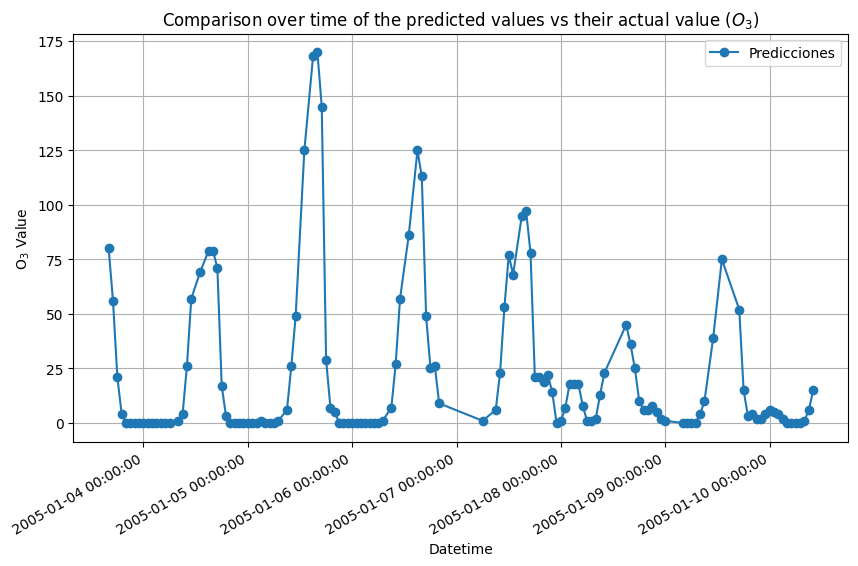

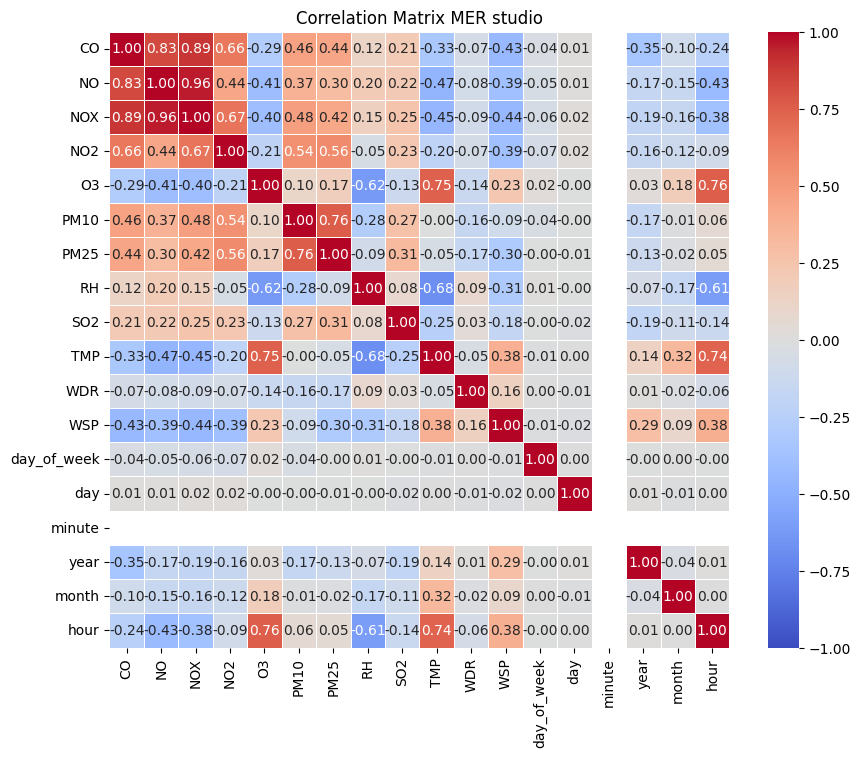

In [9]:
dir = r"C:\Users\valer\Documents\CIC\doctorado\air_pollution\preprocessing_airpollution_data\datos_por_estacion_2005_dic2024\MER.csv"
dir = f"C:/Users/Valeria/Documents/CIC/air_pollution_data/datos_por_estacion_2005_dic2024/MER.csv"
df = pd.read_csv(dir)
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S')
df["month"] = df["date"].dt.month
df["hour"] = df["date"].dt.hour
df = df.dropna().reset_index(drop=True)
df['date'] = pd.to_datetime(df['date'])
df['day_of_week'] = df['date'].dt.weekday
df['date'] = df['date'].dt.strftime('%Y-%m-%d %H:%M:%S')
graficar_predicciones(df["date"][50:180], df.O3[50:180], r'$O_3$')
df, nuevoScaler = norm_df(df)
df = df.drop(columns=['date'])
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, vmin=-1.0, vmax=1.0)
plt.title("Correlation Matrix MER studio")
plt.show()

In [ ]:
nuevoScaler = MinMaxScaler()
#Obtenemos los nuevos escalers
nuevoScaler.fit(df[["CO", "NO", "NOX", "NO2", "O3", "PM10", "PM25", "RH", "SO2", "TMP", "WDR", "WSP", "month", "hour"]])
df_norm_data_escalada = df.copy()
#Obtener los nuevos valores escalados
df_norm_data_escalada[["CO", "NO", "NOX", "NO2", "O3", "PM10", "PM25", "RH", "SO2", "TMP", "WDR", "WSP", "month", "hour"]] = nuevoScaler.transform(df[["CO", "NO", "NOX", "NO2", "O3", "PM10", "PM25", "RH", "SO2", "TMP", "WDR", "WSP","month", "hour"]])
df_norm_data_escalada

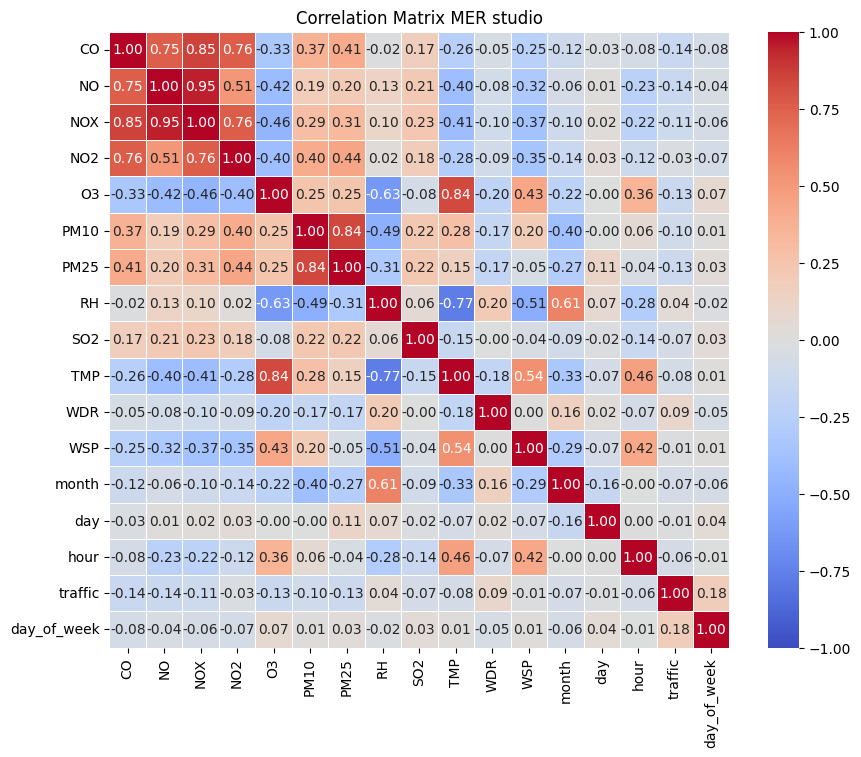

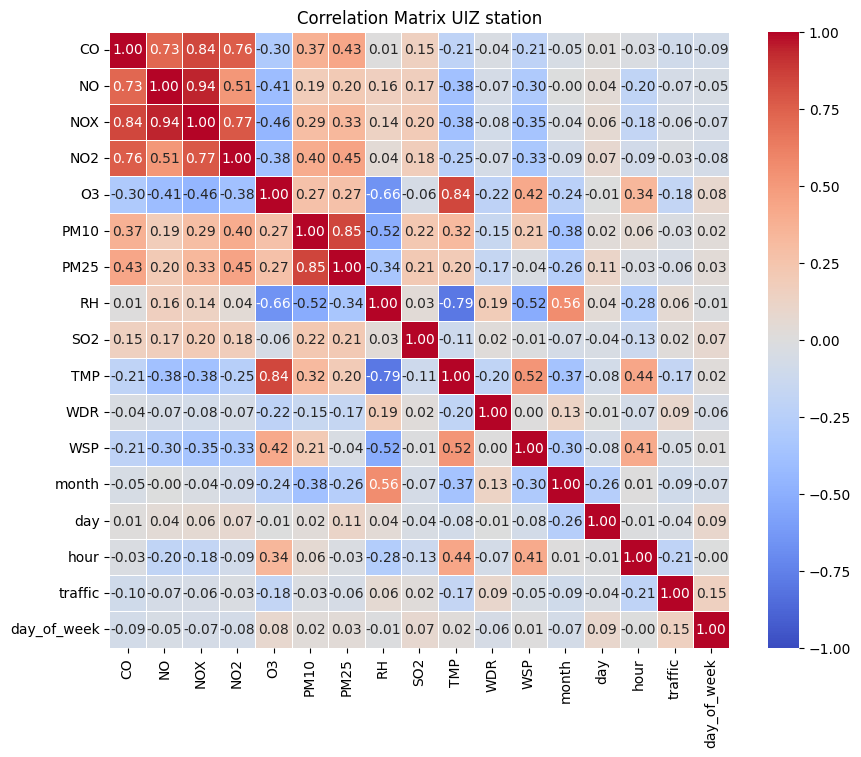

In [3]:
#dir = r"C:\Users\valer\Documents\CIC\doctorado\Proyecto_Innovacion\main\air-poll-predict-dev\API\InfoPostgres\Datos"
dir = r"C:\Users\Valeria\Documents\CIC\air_pollution_data\Datos-sep-dic2024"
file_path = os.path.join(dir,"air_traffic_MER_norm.csv")
df  = pd.read_csv(file_path)
df = df.dropna().reset_index(drop=True)
df['date'] = pd.to_datetime(df['date'])
df['day_of_week'] = df['date'].dt.weekday
df = df.drop(columns=['date', 'year','minute'])
file_path = os.path.join(dir,"air_traffic_UIZ_norm.csv")
df2  = pd.read_csv(file_path)
df2 = df2.dropna().reset_index(drop=True)
df2['date'] = pd.to_datetime(df2['date'])
df2['day_of_week'] = df2['date'].dt.weekday
df2 = df2.drop(columns=['date', 'year','minute'])

corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, vmin=-1.0, vmax=1.0)
plt.title("Correlation Matrix MER studio")
plt.show()

#X = df.drop(columns=['date', 'year', 'month', 'day', 'minute', 'traffic'])
corr = df2.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, vmin=-1.0, vmax=1.0)
plt.title("Correlation Matrix UIZ station")
plt.show()


In [3]:
def correlation_plots(df, df2, station1, station2):
	for var in ["O3", "PM10", "PM25", "NO2", "SO2", "CO", "NO", "NOX", "traffic"]:
		target_variable = var
		# Calcular correlaciones con la variable objetivo
		corr1 = df.corr()[target_variable].drop(target_variable).sort_values(ascending=False)
		corr2 = df2.corr()[target_variable].drop(target_variable).sort_values(ascending=False)
		# Plot
		fig, axes = plt.subplots(1, 2, figsize=(18, 4))

		# First subplot
		sns.barplot(x=corr1.index, y=corr1.values, palette="coolwarm", ax=axes[0])
		axes[0].set_ylim(-1, 1)
		axes[0].set_ylabel("Correlation coeficient")
		axes[0].set_xlabel("Variables")
		axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
		axes[0].grid(axis="y", linestyle="--", alpha=0.7)
		axes[0].set_title(f"Correlation of variables with'{target_variable}' in {station1} station", fontsize=16, fontweight="bold")
		#"""
		# Second subplot
		sns.barplot(x=corr2.index, y=corr2.values, palette="coolwarm", ax=axes[1])
		axes[1].set_ylim(-1, 1)
		axes[1].axhline(0, color='black', linewidth=1)
		axes[1].set_ylabel("Correlation coeficient")
		axes[1].set_xlabel("Variables")
		axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
		axes[1].grid(axis="y", linestyle="--", alpha=0.7)
		axes[1].set_title(f"Correlation of variables with'{target_variable}' in {station2} station", fontsize=16, fontweight="bold")
		# Show plot
		plt.tight_layout()
		plt.show()
		#"""

In [128]:
#dir = r"C:\Users\valer\Documents\CIC\doctorado\Proyecto_Innovacion\main\air-poll-predict-dev\API\InfoPostgres\Datos"
dir = r"C:\Users\Valeria\Documents\CIC\air_pollution_data\Datos-sep-dic2024"
file_path = os.path.join(dir,"air_traffic_MER_prom.csv")
df  = pd.read_csv(file_path)
df = df.dropna().reset_index(drop=True)
df['date'] = pd.to_datetime(df['date'])
df['day_of_week'] = df['date'].dt.weekday
df = df.drop(columns=['date', 'year','minute'])
file_path = os.path.join(dir,"air_traffic_UIZ_norm.csv")
df2  = pd.read_csv(file_path)
df2 = df2.dropna().reset_index(drop=True)
df2['date'] = pd.to_datetime(df2['date'])
df2['day_of_week'] = df2['date'].dt.weekday
df2 = df2.drop(columns=['date', 'year','minute'])

#correlation_plots(df, df2, "MER", "UIZ")

In [129]:
#df  = pd.read_csv('C:/Users/valer/Documents/CIC/doctorado/Proyecto_Innovacion/main/air-poll-predict-dev/API/InfoPostgres/Datos/air_traffic_MER_norm.csv')
dir = r"C:\Users\Valeria\Documents\CIC\air_pollution_data\Datos-sep-dic2024"
file_path = os.path.join(dir,"air_traffic_MER_norm.csv")
#file_path = os.path.join(dir,"air_traffic_MER_prom.csv")
df  = pd.read_csv(file_path)
df = df.dropna().reset_index(drop=True)
df["datetime"] = df["date"].astype(str) + " " + df["hour"].astype(str) + ":" +df["minute"].astype(str)+"0:00"

In [58]:
def graficar_predicciones(new_hours, predicciones, variable):
  """

  Args:
    new_hours:
    target:
    predicciones:
  """
  fechas = new_hours
  # Convertir las fechas a objetos datetime
  fechas_datetime = [datetime.strptime(fecha, '%Y-%m-%d %H:%M:%S') for fecha in fechas]

  # Crear el gráfico
  plt.figure(figsize=(10, 6))

  # Graficar el target y las predicciones en el eje Y
  plt.plot(fechas_datetime, predicciones, label='Predicciones', marker='o')

  # Configurar formato de fecha en el eje X
  plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))

  # Rotar las fechas para mayor legibilidad
  plt.gcf().autofmt_xdate()

  # Configurar etiquetas y título
  plt.xlabel('Datetime')
  plt.ylabel(r'O$_3$ Value')
  title1 = 'Comparison over time of the predicted values ​​vs their actual value (' + variable +')'
  plt.title(title1)

  # Mostrar la leyenda
  plt.legend()
  plt.grid(True)
  # Mostrar el gráfico
  plt.show()

In [ ]:
graficar_predicciones(df["date"][50:180], df.O3[50:180], r'$O_3$')

In [36]:
def plot_values(df_bymonth, df_byhour, varXmonth, varXhour):
	fig, axes = plt.subplots(2, 3, figsize=(16, 5))
	axes[0, 0].scatter(df_bymonth[varXmonth],df_bymonth.O3)
	axes[0, 0].set_ylabel(r'O$_3$ concentration (ppb)')
	axes[0, 0].set_xlabel("Month of the year")
	axes[0, 0].grid(axis="y", linestyle="--", alpha=0.7)

	axes[0, 1].scatter(df_bymonth[varXmonth],df_bymonth.TMP)
	axes[0, 1].set_ylabel("Temperature")
	axes[0, 1].set_xlabel("Month of the year")
	axes[0, 1].grid(axis="y", linestyle="--", alpha=0.7)

	axes[0, 2].plot(df_bymonth[varXmonth],df_bymonth.O3, label=r'O$_3$', color='r')  
	axes[0, 2].plot(df_bymonth[varXmonth],df_bymonth.TMP, label="Temperature", color='b')
	axes[0, 2].legend()  # Add legend
	axes[0, 2].set_ylabel("Values normalized")
	axes[0, 2].set_xlabel("Month of the year")

	axes[1, 0].scatter(df_byhour[varXhour],df_byhour.O3)
	axes[1, 0].set_ylabel(r'O$_3$ concentration (ppb)')
	axes[1, 0].set_xlabel("Mapped hour")
	axes[1, 0].grid(axis="y", linestyle="--", alpha=0.7)

	axes[1, 1].scatter(df_byhour[varXhour],df_byhour.TMP)
	axes[1, 1].set_ylabel("Temperature")
	axes[1, 1].set_xlabel("Hour of the day")
	axes[1, 1].grid(axis="y", linestyle="--", alpha=0.7)

	axes[1, 2].plot(df_byhour[varXhour],df_byhour.O3, label=r'O$_3$', color='r') 
	axes[1, 2].plot(df_byhour[varXhour],df_byhour.TMP, label="Temperature", color='b') 
	axes[1, 2].legend()  # Add legend
	axes[1, 2].set_ylabel("Values normalized")
	axes[1, 2].set_xlabel("Hour of the day")
	axes[1, 2].grid(axis="y", linestyle="--", alpha=0.7)

	# Titles for each subplot (optional)
	axes[0, 0].set_title('Ozone vs month of the year 2024')
	axes[0, 1].set_title('Temperature vs month of the year 2024')
	axes[0, 2].set_title('Tmp&Ozone vs month of the year')
	axes[1, 0].set_title(r'$O_3$ vs the mapped hour')
	axes[1, 1].set_title(r'$O_3$ vs the mapped hour')

	plt.tight_layout()
	plt.show()

In [164]:
dir = r"C:\Users\Valeria\Documents\CIC\air_pollution\seasson_model_comparison"
dir = r"C:\Users\Valeria\Documents\CIC\air_pollution_data"
#dir = r"C:\Users\Valeria\Documents\CIC\proyecto_innovacion\air-poll-predict-dev\API\InfoPostgres\Datos"
dir = r"C:\Users\Valeria\Documents\CIC\air_pollution_data\Datos-sep-dic2024"
file_path = os.path.join(dir,"MER_with_streets2.csv")
file_path = os.path.join(dir,"air_traffic_MER_prom.csv")
#file_path = os.path.join(dir,"air_traffic_MER.csv")
df  = pd.read_csv(file_path)
df = df.dropna().reset_index(drop=True)
#df["datetime"] = df["date"].astype(str) + " " + df["hour"].astype(str) + ":" +df["minute"].astype(str)+"0:00"
df =df.rename(columns={"946690273":"SPD_seg1",	"946690274":"SPD_seg2",	"931397589":"SPD_seg3"})

In [158]:
df.keys()

Index(['date', 'CO', 'NO', 'NOX', 'NO2', 'O3', 'PM10', 'PM25', 'RH', 'SO2',
       'TMP', 'WDR', 'WSP', 'year', 'month', 'day', 'hour', 'minute',
       'traffic'],
      dtype='object')

In [15]:
df["hour2"] = df["date"].astype(str).str[11:13].astype(int)
df

,date,CO,NO,NOX,NO2,O3,PM10,PM25,RH,SO2,TMP,WDR,WSP,hour2
0,2006/01/05 12:00,2.40,53.0,160.0,106.0,51.0,87.0,73.0,38.0,37.0,18.0,12.0,0.2,12
1,2006/01/05 13:00,1.90,45.0,131.0,86.0,61.0,77.0,58.0,33.0,37.0,20.0,345.0,0.5,13
2,2006/01/05 14:00,1.40,30.0,90.0,61.0,66.0,56.0,55.0,28.0,26.0,22.0,9.0,0.4,14
3,2006/01/05 16:00,1.40,49.0,95.0,46.0,52.0,45.0,21.0,25.0,5.0,23.0,298.0,0.8,16
4,2006/01/05 17:00,0.90,43.0,73.0,30.0,40.0,65.0,14.0,23.0,0.0,23.0,5.0,1.3,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88033,2024/05/31 14:00,0.49,1.0,19.0,17.0,89.0,38.0,24.0,12.0,1.0,31.0,31.0,2.4,14
88034,2024/05/31 15:00,0.56,2.0,20.0,18.0,85.0,24.0,14.0,12.0,1.0,32.0,336.0,3.0,15
88035,2024/05/31 20:00,0.71,1.0,35.0,35.0,53.0,44.0,20.0,22.0,1.0,29.0,62.0,2.3,20
88036,2024/05/31 21:00,0.90,1.0,51.0,50.0,35.0,40.0,18.0,25.0,2.0,28.0,98.0,2.5,21


In [10]:
df2 = df[(df["hour2"]>=10) & (df["hour2"]<=16)]

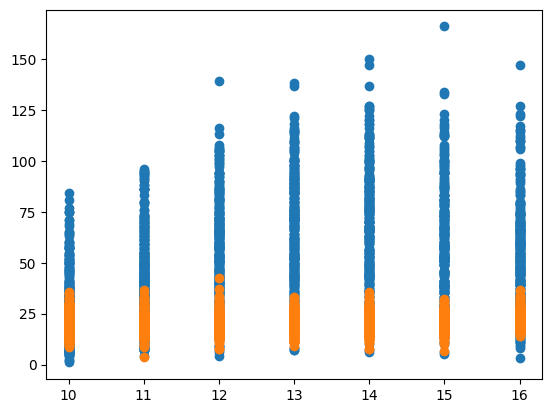

In [48]:
plt.scatter(df2.hour2, df2.O3)
plt.scatter(df2.hour2, df2.SPD_seg1)

Text(0, 0.5, 'SPD')

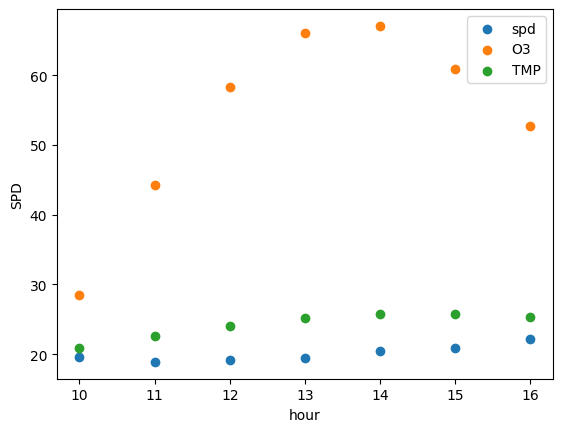

In [58]:
df_bymonth_original = df2.groupby('hour2').agg({
        'O3': 'mean',  
        'TMP': 'mean',  
        "SPD_seg1":'mean'
    }).reset_index()
plt.scatter(df_bymonth_original["hour2"],df_bymonth_original.SPD_seg1)
plt.scatter(df_bymonth_original["hour2"],df_bymonth_original.O3)
plt.scatter(df_bymonth_original["hour2"],df_bymonth_original.TMP)
plt.legend(["spd","O3","TMP"])
plt.xlabel('hour')
plt.ylabel(r'SPD')

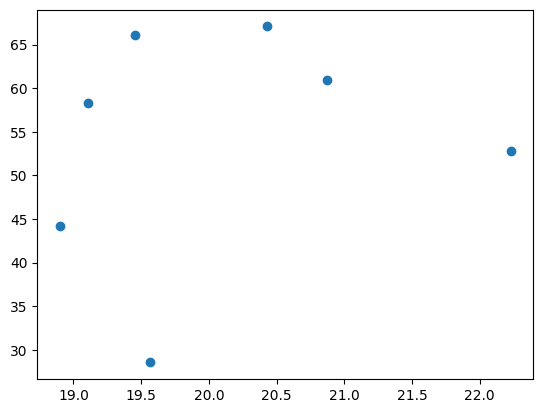

In [60]:
plt.scatter(df_bymonth_original["SPD_seg1"],df_bymonth_original.O3)

In [ ]:
high_corr_pairs 

[('CO', 'NO'),
 ('CO', 'NOX'),
 ('NO', 'CO'),
 ('NO', 'NOX'),
 ('NOX', 'CO'),
 ('NOX', 'NO'),
 ('O3', 'TMP'),
 ('PM10', 'PM25'),
 ('PM25', 'PM10'),
 ('TMP', 'O3'),
 ('SPD_seg1', 'SPD_seg2'),
 ('SPD_seg2', 'SPD_seg1'),
 ('SPD_seg2', 'SPD_seg3'),
 ('SPD_seg3', 'SPD_seg2')]

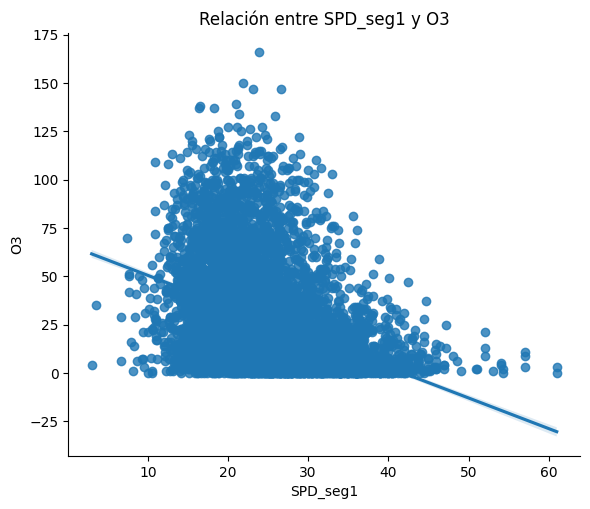

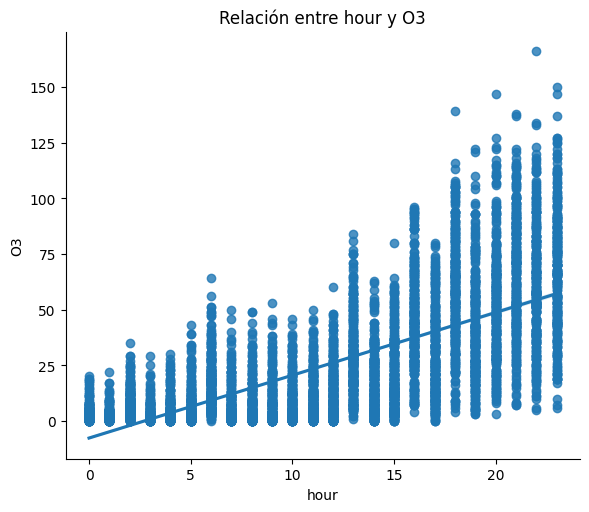

In [66]:

from scipy.stats import pearsonr, spearmanr
num_df = df.select_dtypes(include='number')

# Calculamos la matriz de correlación de Pearson
corr_matrix = num_df.corr(method='pearson')

# Visualizamos scatter si corr > 0.8 o < -0.8
high_corr_pairs = [(i, j) for i in corr_matrix.columns for j in corr_matrix.columns 
                   if i != j and abs(corr_matrix.loc[i, j]) > 0.8]
high_corr_pairs = [("SPD_seg1","O3"), ("hour","O3")]
for var1, var2 in high_corr_pairs:
    sns.lmplot(data=df, x=var1, y=var2, height=5, aspect=1.2)
    plt.title(f'Relación entre {var1} y {var2}')
    plt.show()


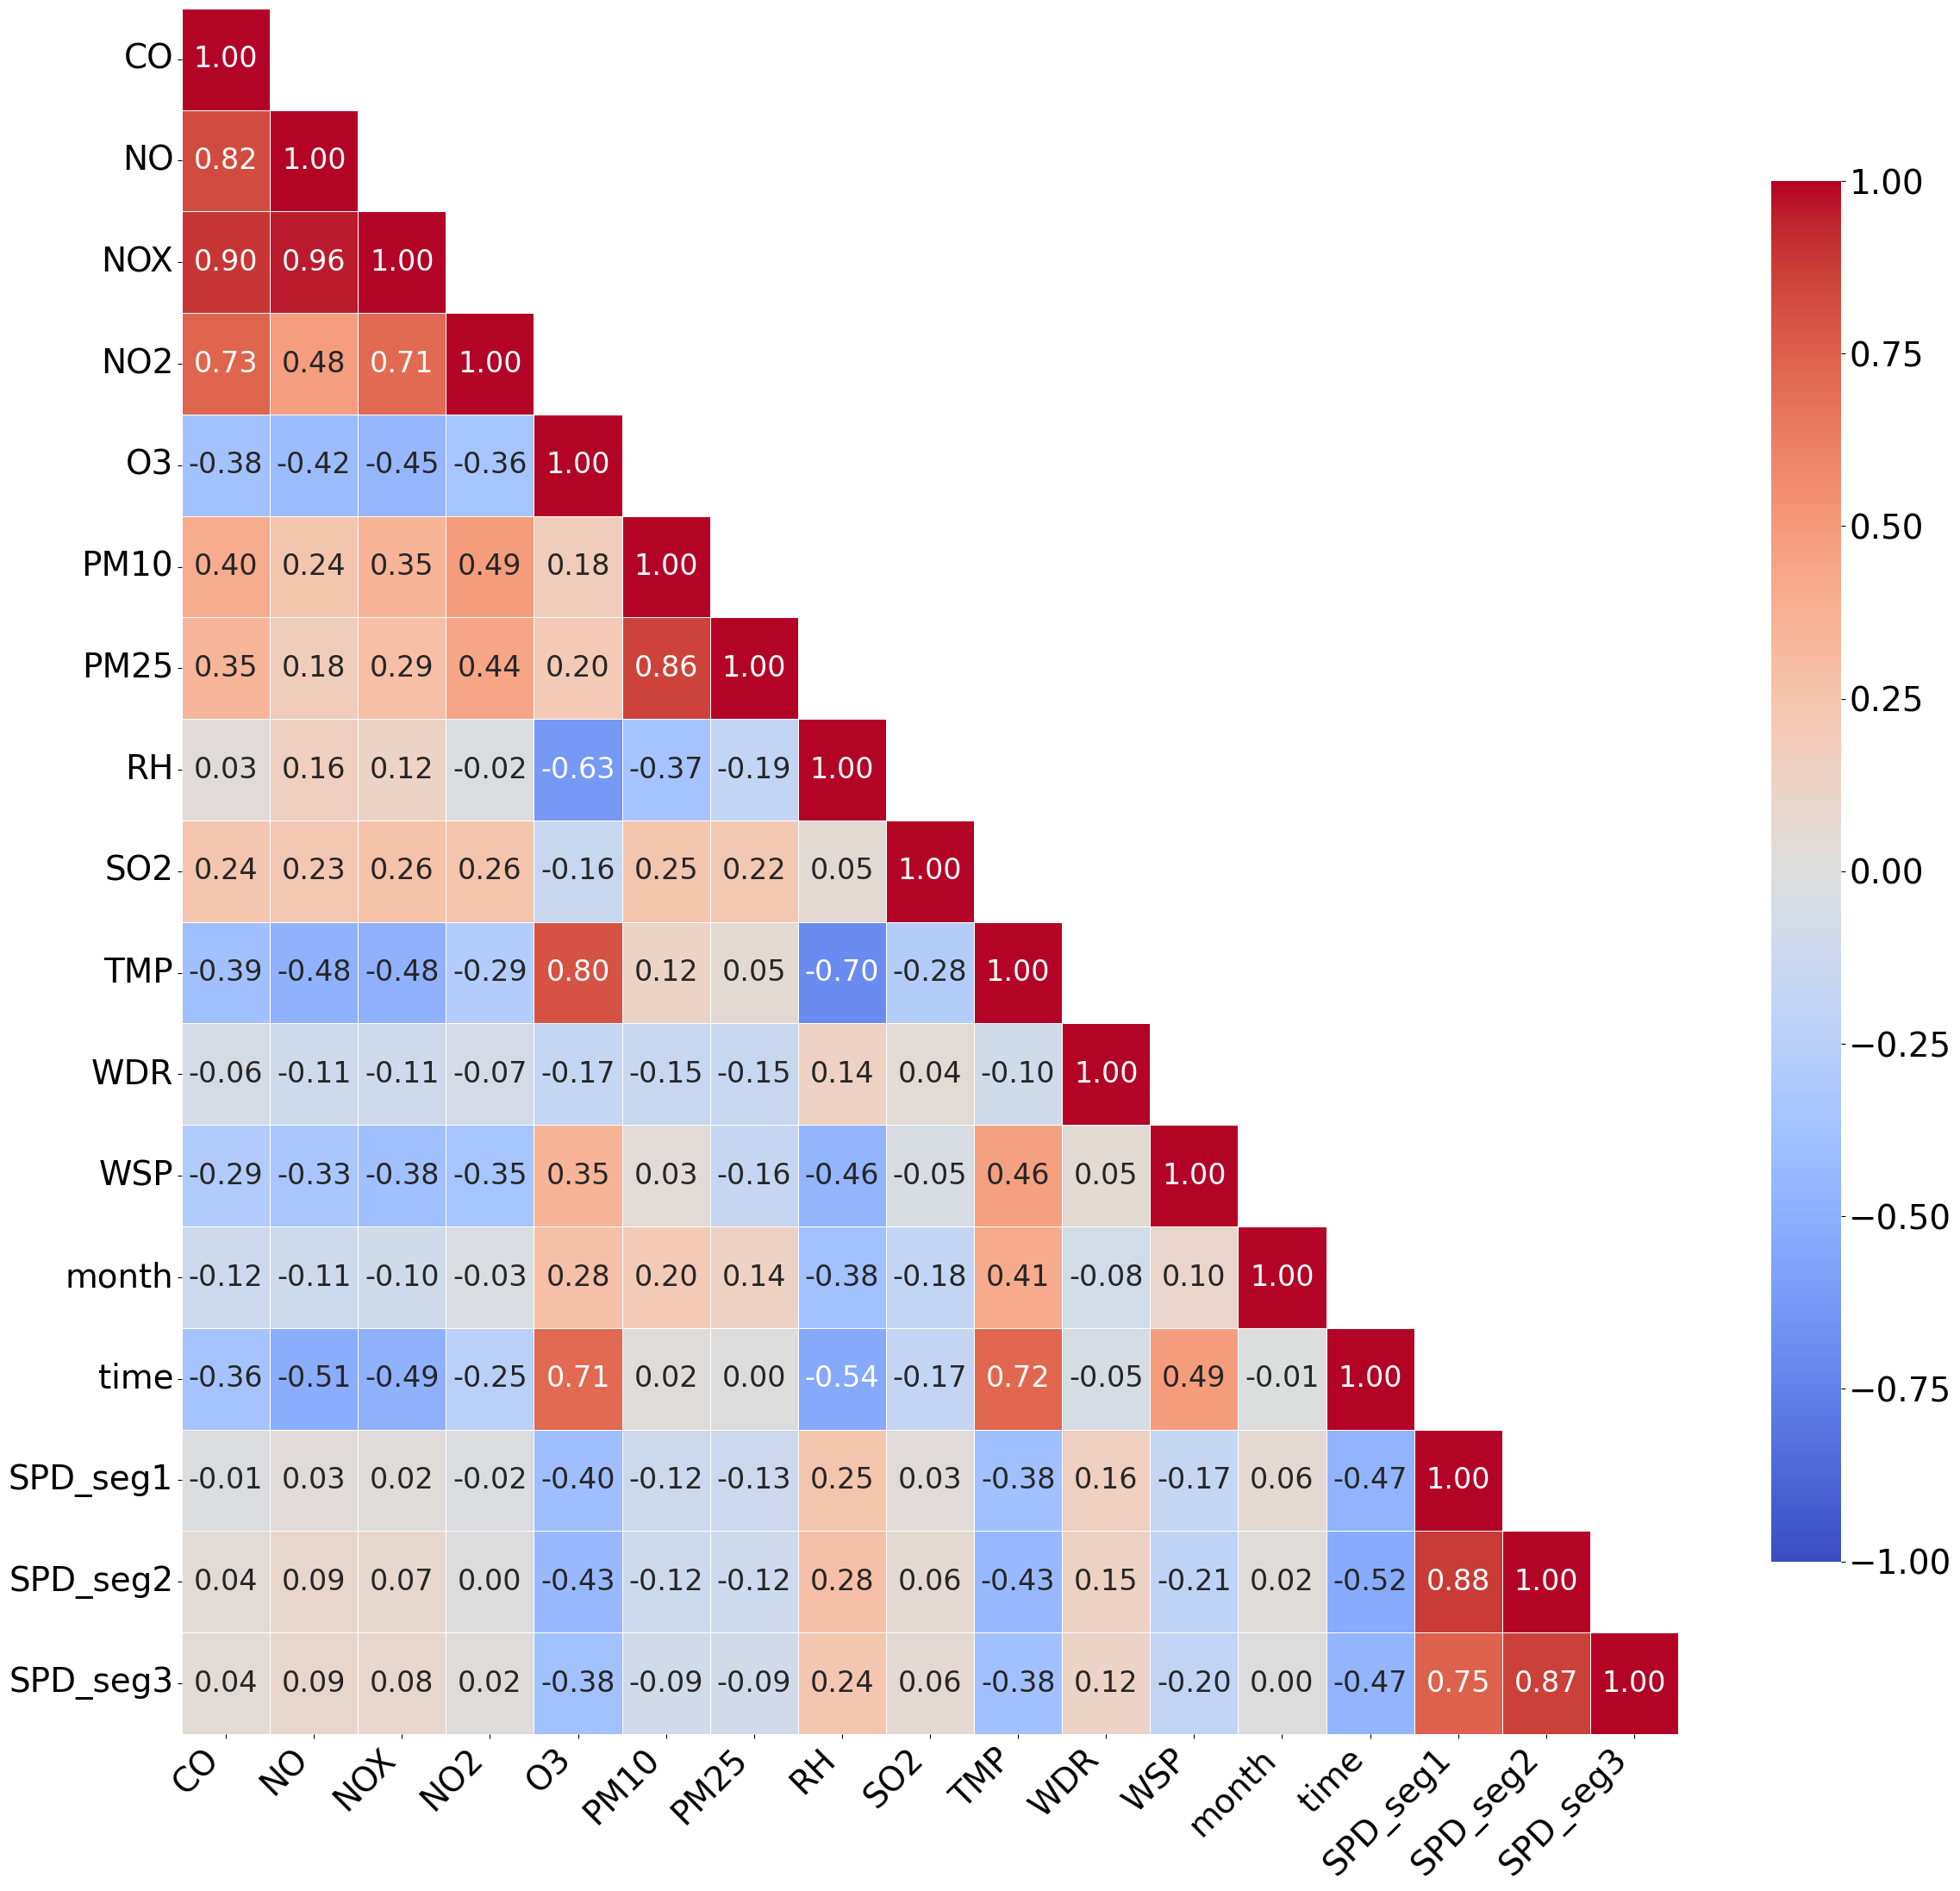

In [70]:
#df2 = df.drop(columns=["year", "minute"])
df = df.rename(columns={"hour":"time"})
corr = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool),1)
# Configurar el gráfico
plt.figure(figsize=(28, 26))
heatmap = sns.heatmap(
    corr,
    mask=mask,                 # Aplicar la máscara
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5,
    vmin=-1.0,
    vmax=1.0,
    annot_kws={"size": 24},          # Tamaño de los números en las celdas
    cbar_kws={"shrink": 0.8}         # Opcional: tamaño de la barra de color
)

# Aumentar tamaño de los nombres de variables (ticks del eje)
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=28, rotation=45, ha='right')
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=28, rotation=0)
cbar = plt.gcf().axes[-1]  # Colorbar is usually the last axis added
cbar.tick_params(labelsize=28)  # Set desired fontsize
plt.title("", fontsize=28)
#plt.title(f"Correlation Matrix {station} studio")
plt.show()

C:\Users\Valeria\AppData\Local\Temp\ipykernel_27104\1673083469.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(o3_corr_sorted.index, rotation=45)


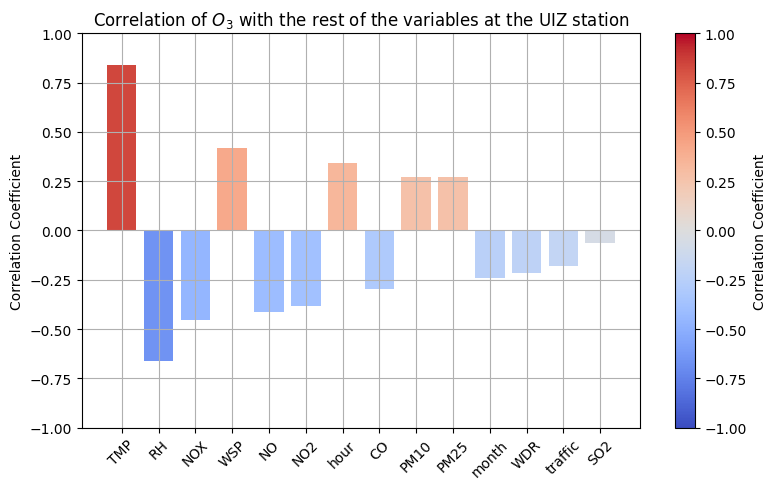

In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
dir = r"C:\Users\Valeria\Documents\CIC\proyecto_innovacion\air-poll-predict-dev\API\InfoPostgres\Datos"
#file_path = os.path.join(dir,"air_traffic_MER_prom.csv")
dir = r"C:\Users\Valeria\Documents\CIC\air_pollution_data\Datos-sep-dic2024"
file_path = os.path.join(dir,"air_traffic_MER.csv")

file_path = os.path.join(dir,"air_traffic_UIZ_norm.csv")

df  = pd.read_csv(file_path)
df = df.dropna().reset_index(drop=True)
df = df.drop(columns={"day","year","minute"})
# Compute correlation matrix
corr = df.corr(numeric_only=True)
o3_corr = corr['O3'].drop('O3')
o3_corr_sorted = o3_corr.reindex(o3_corr.abs().sort_values(ascending=False).index)

# Normalize to map colors
norm = plt.Normalize(-1, 1)
cmap = plt.cm.coolwarm
colors = cmap(norm(o3_corr_sorted.values))

# Create figure and axes
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(o3_corr_sorted.index, o3_corr_sorted.values, color=colors)

ax.set_ylim(-1, 1)
ax.set_ylabel('Correlation Coefficient')
ax.set_title(r'Correlation of $O_3$ with the rest of the variables at the UIZ station')
ax.set_xticklabels(o3_corr_sorted.index, rotation=45)

# Add colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # only needed for matplotlib < 3.1
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Correlation Coefficient')
plt.grid()
plt.tight_layout()
plt.show()


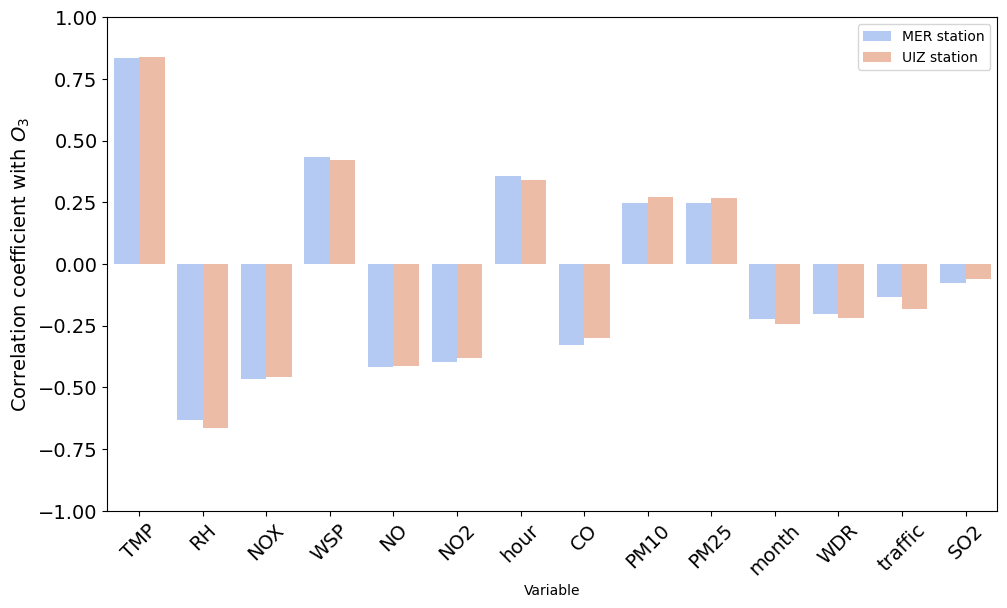

In [127]:
file_path = os.path.join(dir,"air_traffic_MER_norm.csv")
df  = pd.read_csv(file_path)

file_path = os.path.join(dir,"air_traffic_UIZ_norm.csv")
df2  = pd.read_csv(file_path)

df = df.dropna().reset_index(drop=True)
df = df.drop(columns={"day","year","minute"})
df2 = df2.dropna().reset_index(drop=True)
df2 = df2.drop(columns={"day","year","minute"})


o3_corr1 = df.corr(numeric_only=True)['O3'].drop('O3')
o3_corr2 = df2.corr(numeric_only=True)['O3'].drop('O3')
o3_corr_sorted1 = o3_corr1.reindex(o3_corr.abs().sort_values(ascending=False).index)
o3_corr_sorted2 = o3_corr2.reindex(o3_corr.abs().sort_values(ascending=False).index)

# Ensure both have the same variables and same order
common_vars = o3_corr_sorted1.index.intersection(o3_corr_sorted2.index)
corr1 = o3_corr_sorted1.loc[common_vars]
corr2 = o3_corr_sorted2.loc[common_vars]

# Combine into a single DataFrame for seaborn
corr_df = pd.DataFrame({
    'Variable': common_vars,
    'MER station': corr1.values,
    'UIZ station': corr2.values
})
# Melt the dataframe for seaborn
corr_melted = corr_df.melt(id_vars='Variable', var_name='', value_name='Correlation')

# Plot grouped bars
plt.figure(figsize=(10, 6))
sns.barplot(data=corr_melted, x='Variable', y='Correlation', hue='', palette='coolwarm')

plt.ylim(-1, 1)
plt.ylabel(r'Correlation coefficient with $O_3$', fontsize=14)
#plt.title('Comparison of Correlations with O₃')
plt.xticks(rotation=45)
plt.tight_layout()
cbar = plt.gcf().axes[-1]  # Colorbar is usually the last axis added
cbar.tick_params(labelsize=14)  # Set desired fontsize
plt.title("", fontsize=14)
plt.show()

C:\Users\Valeria\AppData\Local\Temp\ipykernel_27104\2606898309.py:40: UserWarning: The palette list has more values (28) than needed (2), which may not be intended.
  bars = sns.barplot(


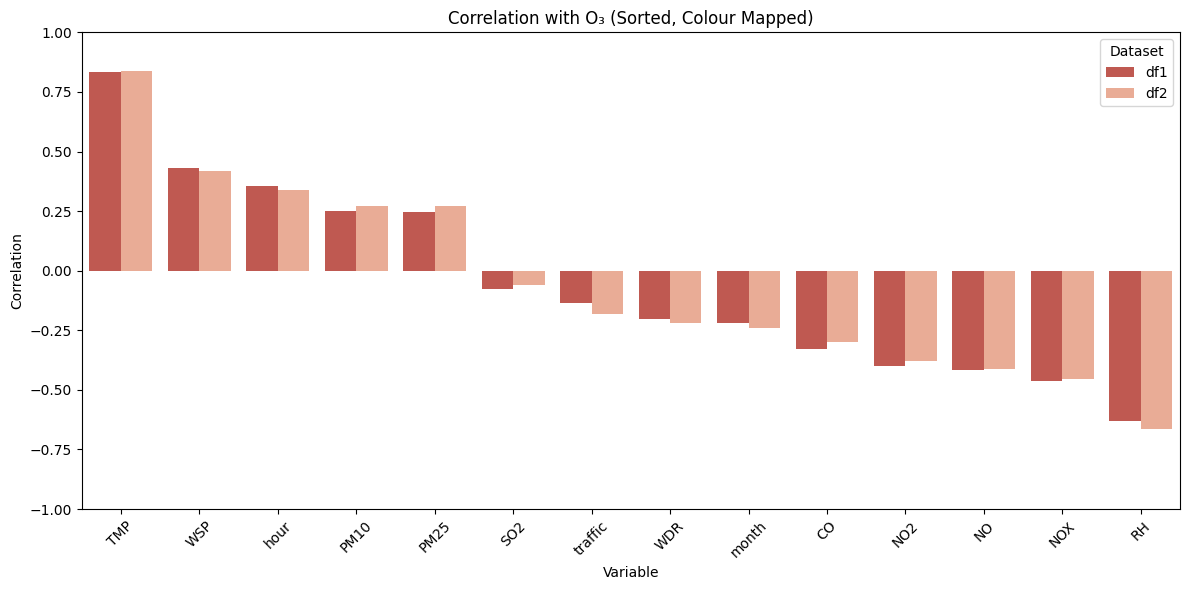

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample correlation data
# Replace this with your actual correlation data
corr1 = df.corr(numeric_only=True)['O3'].drop('O3')
corr2 = df2.corr(numeric_only=True)['O3'].drop('O3')

# Keep only common variables
common_vars = corr1.index.intersection(corr2.index)
corr1 = corr1.loc[common_vars]
corr2 = corr2.loc[common_vars]

# Average correlation to sort
avg_corr = (corr1 + corr2) / 2
sorted_vars = avg_corr.sort_values(ascending=False).index

# Create DataFrame for plotting
corr_df = pd.DataFrame({
    'Variable': sorted_vars,
    'df1': corr1[sorted_vars].values,
    'df2': corr2[sorted_vars].values
}).set_index('Variable')

# Melt for seaborn
corr_melted = corr_df.reset_index().melt(id_vars='Variable', var_name='Dataset', value_name='Correlation')

# Normalize correlation values for colormap
norm = plt.Normalize(-1, 1)
cmap = plt.cm.coolwarm

# Map colour based on correlation
colors = [cmap(norm(val)) for val in corr_melted['Correlation']]

# Create plot
fig, ax = plt.subplots(figsize=(12, 6))

bars = sns.barplot(
    data=corr_melted,
    x='Variable', y='Correlation', hue='Dataset',
    palette=colors, ax=ax
)

# Final formatting
ax.set_ylim(-1, 1)
ax.set_title('Correlation with O₃ (Sorted, Colour Mapped)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [17]:
df

,date,CO,NO,NOX,NO2,O3,PM10,PM25,RH,SO2,TMP,WDR,WSP,hour2
0,2006/01/05 12:00,2.40,53.0,160.0,106.0,51.0,87.0,73.0,38.0,37.0,18.0,12.0,0.2,12
1,2006/01/05 13:00,1.90,45.0,131.0,86.0,61.0,77.0,58.0,33.0,37.0,20.0,345.0,0.5,13
2,2006/01/05 14:00,1.40,30.0,90.0,61.0,66.0,56.0,55.0,28.0,26.0,22.0,9.0,0.4,14
3,2006/01/05 16:00,1.40,49.0,95.0,46.0,52.0,45.0,21.0,25.0,5.0,23.0,298.0,0.8,16
4,2006/01/05 17:00,0.90,43.0,73.0,30.0,40.0,65.0,14.0,23.0,0.0,23.0,5.0,1.3,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88033,2024/05/31 14:00,0.49,1.0,19.0,17.0,89.0,38.0,24.0,12.0,1.0,31.0,31.0,2.4,14
88034,2024/05/31 15:00,0.56,2.0,20.0,18.0,85.0,24.0,14.0,12.0,1.0,32.0,336.0,3.0,15
88035,2024/05/31 20:00,0.71,1.0,35.0,35.0,53.0,44.0,20.0,22.0,1.0,29.0,62.0,2.3,20
88036,2024/05/31 21:00,0.90,1.0,51.0,50.0,35.0,40.0,18.0,25.0,2.0,28.0,98.0,2.5,21


In [169]:
dir = r"C:\Users\Valeria\Documents\CIC\air_pollution\seasson_model_comparison"
dir = r"C:\Users\Valeria\Documents\CIC\air_pollution_data"
#dir = r"C:\Users\Valeria\Documents\CIC\proyecto_innovacion\air-poll-predict-dev\API\InfoPostgres\Datos"
dir = r"C:\Users\Valeria\Documents\CIC\air_pollution_data\Datos-sep-dic2024"
file_path = os.path.join(dir,"MER_with_streets2.csv")
file_path = os.path.join(dir,"air_traffic_MER_prom.csv")
#file_path = os.path.join(dir,"air_traffic_MER.csv")
df  = pd.read_csv(file_path)
df = df.dropna().reset_index(drop=True)


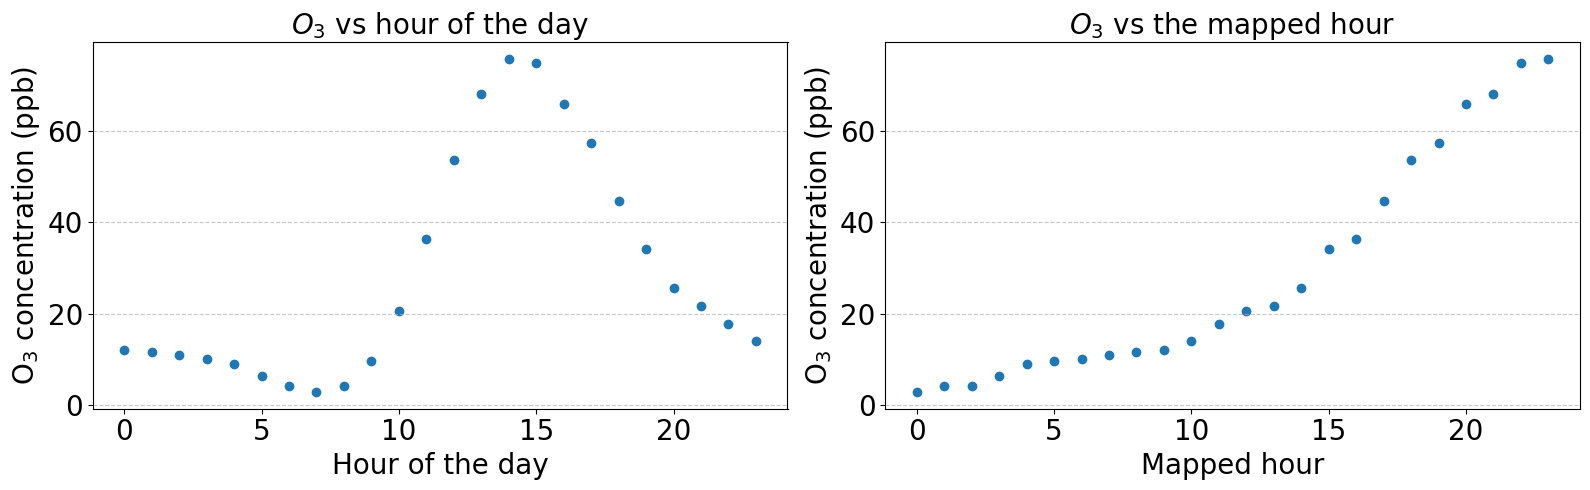

In [170]:
#df_byhour_original2 = df_byhour_original.copy()
#df_byhour
import matplotlib.pyplot as plt

df_byhour_original = df.groupby('hour').agg({
        'O3': 'mean',  
        'TMP': 'mean', 
    }).reset_index()
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
hour_idx= {7:0,8:1, 6:2, 5:3,  4:4, 3:5, 2:6,  9:7, 1:8, 0:9, 23:10, 22:11, 10:12, 21:13, 20:14, 19:15, 11:16, 18:17, 12:18, 17:19, 13:20, 16:21, 15:22, 14:23 }
df_byhour = df_byhour_original.sort_values(by='O3', ascending=True)
df_byhour["hour_idx"] = df_byhour["hour"].map(hour_idx)

varXhour = "hour"

# Left subplot
axes[1].scatter(df_byhour_original[varXhour], df_byhour.O3)
axes[0].set_ylabel(r'O$_3$ concentration (ppb)', fontsize=20)
axes[0].set_xlabel("Hour of the day", fontsize=20)
axes[0].set_title(r'$O_3$ vs hour of the day', fontsize=20)
axes[0].grid(axis="y", linestyle="--", alpha=0.7)
axes[0].tick_params(axis='both', labelsize=20)

# Right subplot
axes[0].scatter(df_byhour[varXhour], df_byhour.O3)
axes[1].set_ylabel(r'O$_3$ concentration (ppb)', fontsize=20)
axes[1].set_xlabel("Mapped hour", fontsize=20)
axes[1].set_title(r'$O_3$ vs the mapped hour', fontsize=20)
axes[1].grid(axis="y", linestyle="--", alpha=0.7)
axes[1].tick_params(axis='both', labelsize=20)

plt.tight_layout()
plt.show()


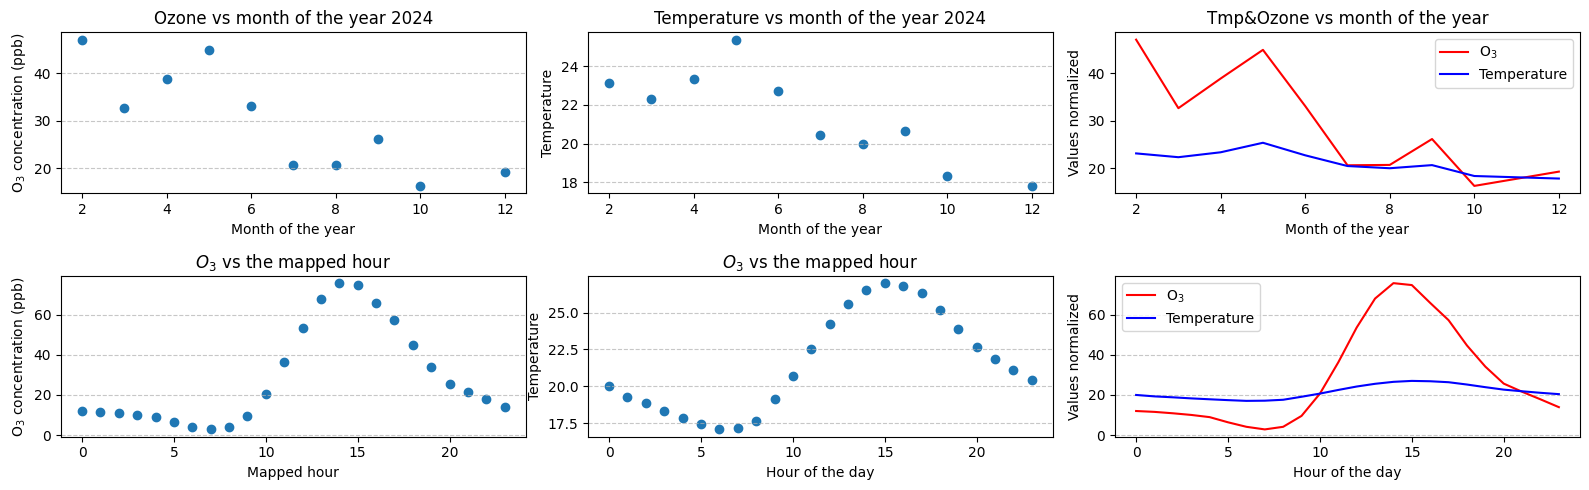

In [160]:
df_bymonth_original = df.groupby('month').agg({
        'O3': 'mean',  
        'TMP': 'mean',  
    }).reset_index()
df_byhour_original = df.groupby('hour').agg({
        'O3': 'mean',  
        'TMP': 'mean', 
    }).reset_index()
plot_values(df_bymonth_original,df_byhour_original, "month", "hour")

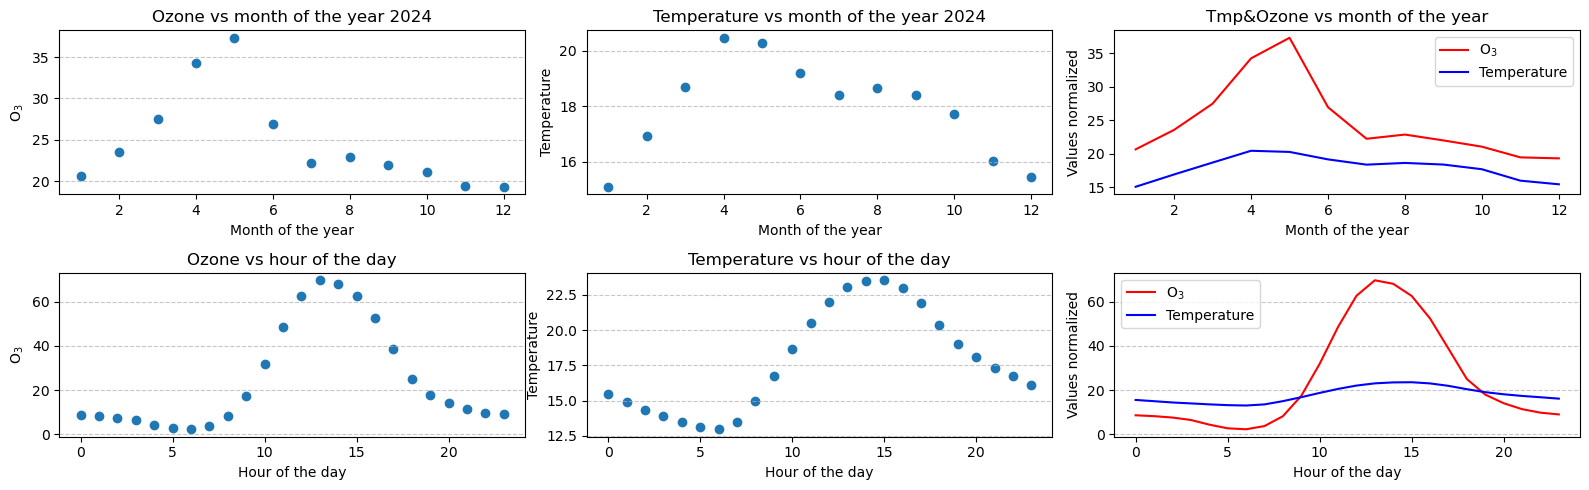

In [20]:
df_bymonth_original = df.groupby('month').agg({
        'O3': 'mean',  
        'TMP': 'mean',  
    }).reset_index()
df_byhour_original = df.groupby('hour').agg({
        'O3': 'mean',  
        'TMP': 'mean', 
    }).reset_index()
plot_values(df_bymonth_original,df_byhour_original, "month", "hour")

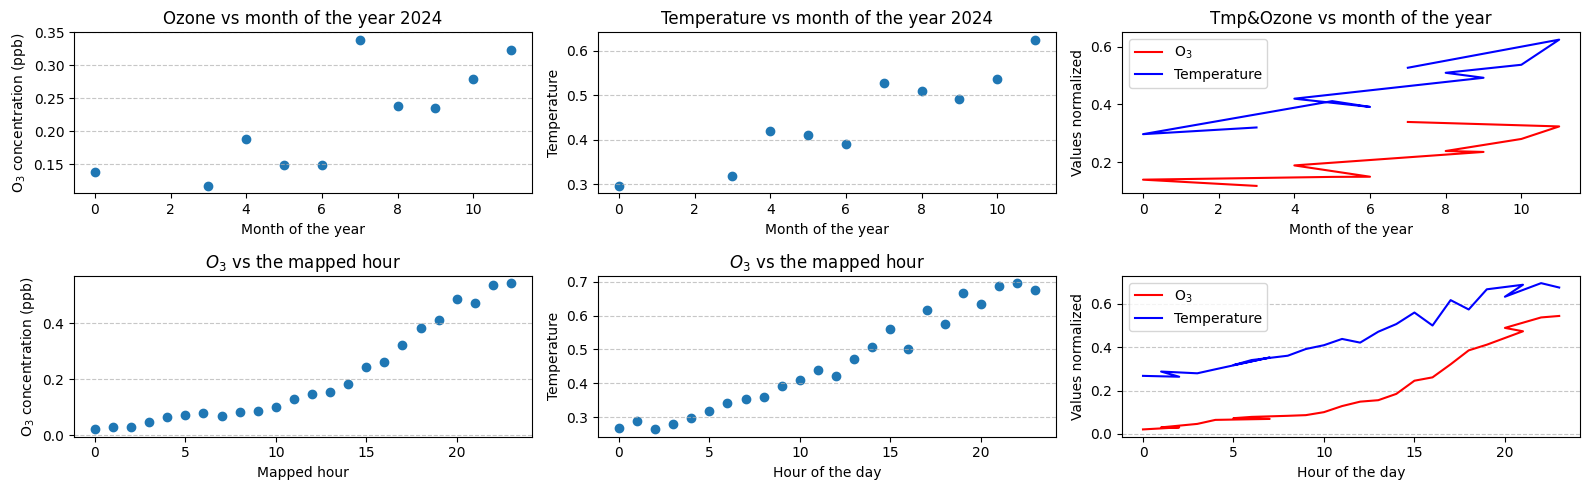

In [134]:
month_idx = {12:0, 11:1, 1:2, 10:3, 9:4, 7:5, 8:6, 2:7, 6:8, 3:9, 4:10, 5:11}
df_bymonth = df_bymonth_original.sort_values(by='O3', ascending=True)
df_bymonth["month_idx"] = df_bymonth["month"].map(month_idx)

hour_idx= {6:0, 5:1, 7:2, 4:3, 3:4, 2:5, 8:6, 1:7, 0:8, 23:9, 22:10, 21:11, 20:12, 9:13, 19:14, 18:15, 10:16, 17:17, 11:18, 16:19, 15:20, 12:21, 14:22, 13:23 }
hour_idx= {7:0,8:1, 6:2, 5:3,  4:4, 3:5, 2:6,  9:7, 1:8, 0:9, 23:10, 22:11, 10:12, 21:13, 20:14, 19:15, 11:16, 18:17, 12:18, 17:19, 13:20, 16:21, 15:22, 14:23 }
df_byhour = df_byhour_original.sort_values(by='O3', ascending=True)
df_byhour["hour_idx"] = df_byhour["hour"].map(hour_idx)

plot_values(df_bymonth,df_byhour, "month_idx", "hour_idx")

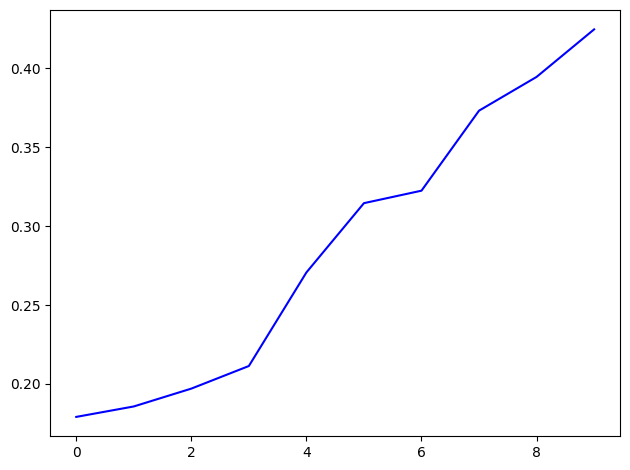

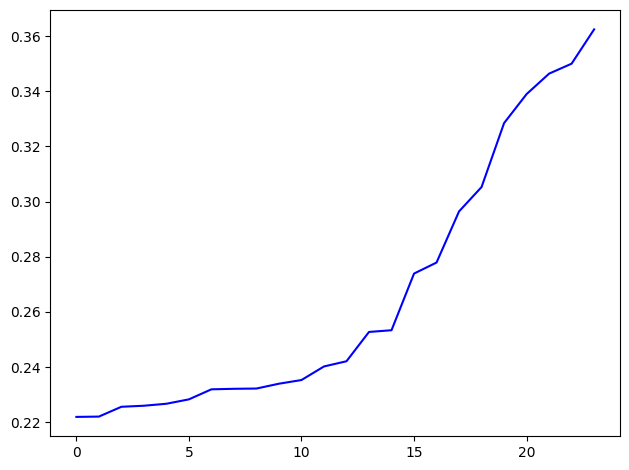

In [30]:
dir = r"C:\Users\Valeria\Documents\CIC\air_pollution_data\Datos-sep-dic2024"
file_path = os.path.join(dir,"air_traffic_MER_norm.csv")
#file_path = os.path.join(dir,"air_traffic_MER_prom.csv")
df  = pd.read_csv(file_path)
df = df.dropna().reset_index(drop=True)
df["datetime"] = df["date"].astype(str) + " " + df["hour"].astype(str) + ":" +df["minute"].astype(str)+"0:00"
target = "PM25"
df_bymonth_original = df.groupby('month').agg({
        target: 'mean',   
    }).reset_index()

df_byhour_original = df.groupby('hour').agg({
        target: 'mean',  
    }).reset_index()

df_bymonth = df_bymonth_original.sort_values(by=target, ascending=True)
df_byhour = df_byhour_original.sort_values(by=target, ascending=True)

#month_idx= {1:11, 2:5, 3:9, 4:4, 5:10, 6:3, 7:2, 8:1, 9:8, 10:6, 11:7, 12:12} #CO
#hour_idx = {15:0, 14:1, 16:2, 13:3, 17:4, 4:5, 18:6, 12:7, 3:8, 2:9, 5:10, 1:11, 19:12, 0:13, 22:14, 21:15, 20:16, 23:17, 11:18, 6:19, 10:20, 7:21, 9:22, 8:23} # CO
#hour_idx = {15:0, 14:1, 16:2, 17:3, 13:4, 18:5, 19:6, 12:7, 21:8, 22:9, 20:10, 23:11, 0:12, 4:13, 1:14, 2:15, 3:16, 11:17, 5:18, 10:19, 6:20, 9:21, 7:22, 8:23} #NO
#month_idx= {6:0, 10:1, 11:2, 8:3, 9:4, 4:5, 7:6, 2:7, 1:8, 5:9, 3:10, 12:11} #NO

hour_idx = {}
for idx,hr in enumerate(df_byhour.hour):
    hour_idx[hr] = idx
    
month_idx = {}
for idx,month in enumerate(df_bymonth.month):
    month_idx[month] = idx

df_byhour["hour_idx"] = df_byhour["hour"].map(hour_idx)
df_bymonth["month_idx"] = df_bymonth["month"].map(month_idx)
varXmonth = "month_idx"
varXhour = "hour_idx"
plt.plot(df_bymonth[varXmonth],df_bymonth[target], label=str(target), color='b')
plt.tight_layout()
plt.show()
plt.plot(df_byhour[varXhour],df_byhour[target], label=str(target), color='b') 
plt.tight_layout()
plt.show()


In [12]:
df

,CO,NO,NOX,NO2,O3,PM10,PM25,RH,SO2,TMP,WDR,WSP,day_of_week
0,6.40,182.0,277.0,95.0,0.0,136.0,99.0,55.0,20.0,11.0,134.0,0.2,5
1,3.60,77.0,143.0,67.0,1.0,182.0,142.0,60.0,17.0,8.0,56.0,0.2,5
2,6.50,193.0,258.0,67.0,1.0,274.0,179.0,65.0,20.0,8.0,83.0,0.3,5
3,6.60,187.0,255.0,67.0,1.0,302.0,248.0,67.0,19.0,7.0,72.0,0.3,5
4,6.10,164.0,233.0,70.0,1.0,300.0,246.0,66.0,20.0,6.0,75.0,0.3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
104298,1.03,27.0,65.0,38.0,1.0,67.0,55.0,63.0,1.0,11.0,184.0,1.2,4
104299,1.20,45.0,82.0,36.0,1.0,29.0,16.0,65.0,1.0,10.0,163.0,0.5,4
104300,1.31,61.0,96.0,35.0,1.0,31.0,18.0,68.0,1.0,10.0,159.0,0.7,4
104301,2.29,196.0,241.0,45.0,1.0,42.0,28.0,67.0,4.0,9.0,109.0,0.9,4


In [13]:
dir = r"C:\Users\Valeria\Documents\CIC\air_pollution_data\Datos-sep-dic2024"
file_path = os.path.join(dir,"air_traffic_MER_norm.csv")

file_path = f"C:/Users/Valeria/Documents/CIC/air_pollution_data/datos_por_estacion_2005_dic2024/MER.csv"
df  = pd.read_csv(file_path)
df = df.dropna().reset_index(drop=True)
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['month'] = df['date'].dt.hour
df['day_of_week'] = df['date'].dt.weekday
df = df.drop(columns=['date'])
month_idx= {12:4, 11:2, 10:1, 9:7, 8:6, 7:5, 6:9, 5:11, 4:10, 3:8, 2:12, 1:3}
df["month_idx"] = df["month"].map(month_idx)
hour_idx= {7:0, 6:1, 8:2, 5:3, 4:4, 9:5, 3:6, 2:7, 1:8, 0:9, 23:10, 22:11, 10:12, 21:13, 20:14, 19:15, 11:16, 18:17, 12:18, 17:19, 16:20, 13:21, 15:22, 14:23 }
df["hour_idx"] = df["hour"].map(hour_idx)
"""
file_path = os.path.join(dir,"air_traffic_UIZ_norm.csv")
df2  = pd.read_csv(file_path)
df2 = df2.dropna().reset_index(drop=True)
df2['date'] = pd.to_datetime(df2['date'])
df2['day_of_week'] = df2['date'].dt.weekday
df2 = df2.drop(columns=['date', 'year','minute'])
month_idx= {12:4, 11:2, 10:1, 9:7, 8:6, 7:5, 6:9, 5:11, 4:10, 3:8, 2:12, 1:3}
df2["month_idx"] = df2["month"].map(month_idx)
hour_idx= {7:0, 6:1, 8:2, 5:3, 4:4, 9:5, 3:6, 2:7, 1:8, 0:9, 23:10, 22:11, 10:12, 21:13, 20:14, 19:15, 11:16, 18:17, 12:18, 17:19, 16:20, 13:21, 15:22, 14:23 }
df2["hour_idx"] = df2["hour"].map(hour_idx)
"""
correlation_plots(df, df, "MER", "UIZ")

KeyError: 'hour'

Text(0.5, 1.0, 'Correlation Matrix UIZ station')

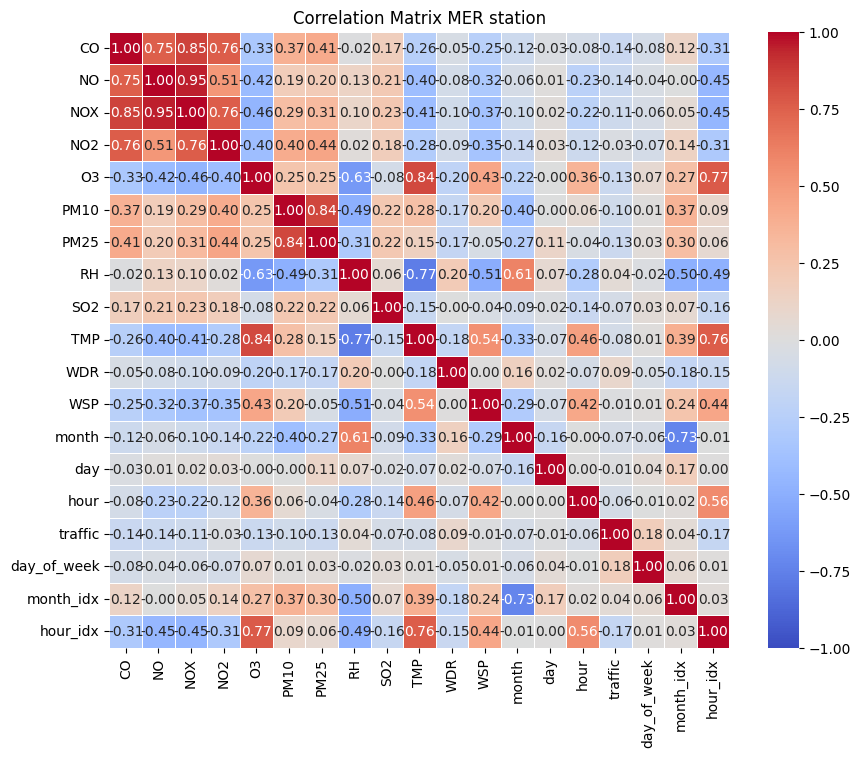

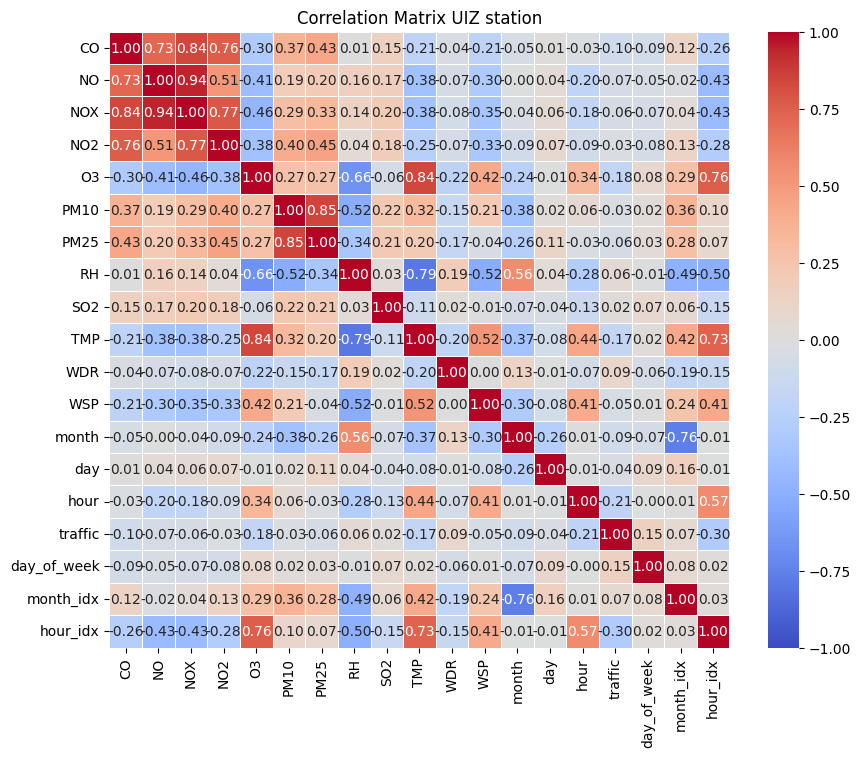

In [29]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, vmin=-1.0, vmax=1.0)
plt.title("Correlation Matrix MER station")

corr = df2.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, vmin=-1.0, vmax=1.0)
plt.title("Correlation Matrix UIZ station")

Plot of the temperature vs ozone

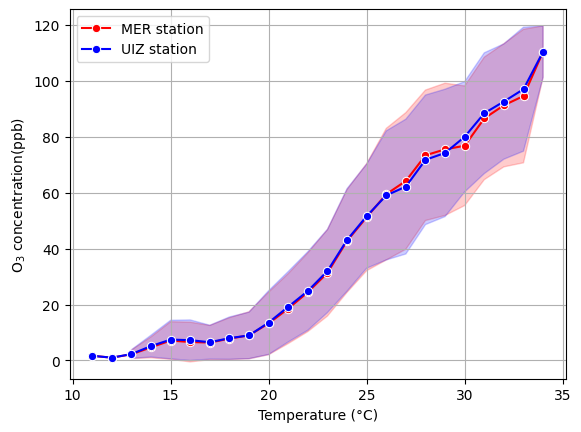

In [56]:
dir = r"C:\Users\Valeria\Documents\CIC\air_pollution_data\Datos-sep-dic2024"
file_path = os.path.join(dir,"air_traffic_MER_prom.csv")
df  = pd.read_csv(file_path)
df = df.dropna().reset_index(drop=True)

file_path = os.path.join(dir,"air_traffic_UIZ_prom.csv")
df2  = pd.read_csv(file_path)
df2 = df2.dropna().reset_index(drop=True)
import seaborn as sns

sns.lineplot(data=df, x='TMP', y='O3', errorbar='sd', marker='o', label='MER station', color='r')
sns.lineplot(data=df2, x='TMP', y='O3', errorbar='sd', marker='o', label='UIZ station', color='b')


plt.xlabel('Temperature (°C)')
plt.ylabel(r'O$_3$ concentration(ppb)')
title1 = r'Temperature vs O$_3$'
#plt.title(title1)
plt.legend()
plt.grid(True)
plt.show()

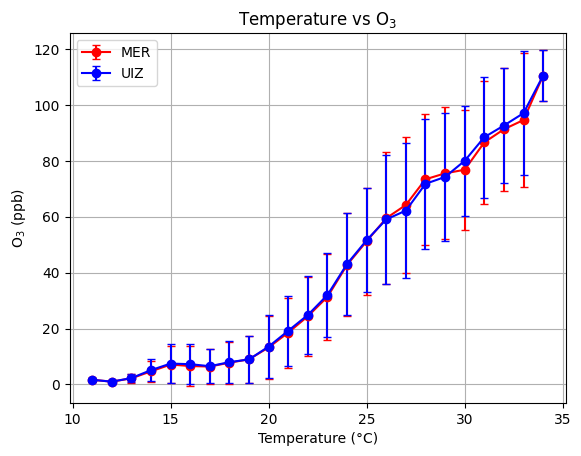

In [47]:
# Group by temperature and calculate mean and standard deviation of O3
df_tmp = df.groupby('TMP').agg({'O3': ['mean', 'std']}).reset_index()
# Rename columns for convenience
df_tmp.columns = ['TMP', 'O3_mean', 'O3_std']
df_tmp2 = df2.groupby('TMP').agg({'O3': ['mean', 'std']}).reset_index()
# Rename columns for convenience
df_tmp2.columns = ['TMP', 'O3_mean', 'O3_std']
# Plot with error bars (standard deviation)
plt.errorbar(df_tmp.TMP, df_tmp.O3_mean, yerr=df_tmp.O3_std, fmt='o-', label='MER', color='r', capsize=3)
plt.errorbar(df_tmp2.TMP, df_tmp2.O3_mean, yerr=df_tmp2.O3_std, fmt='o-', label='UIZ', color='b', capsize=3)

plt.xlabel('Temperature (°C)')
plt.ylabel(r'O$_3$ (ppb)')
title1 = r'Temperature vs O$_3$'
plt.title(title1)
plt.legend()
plt.grid(True)
plt.show()

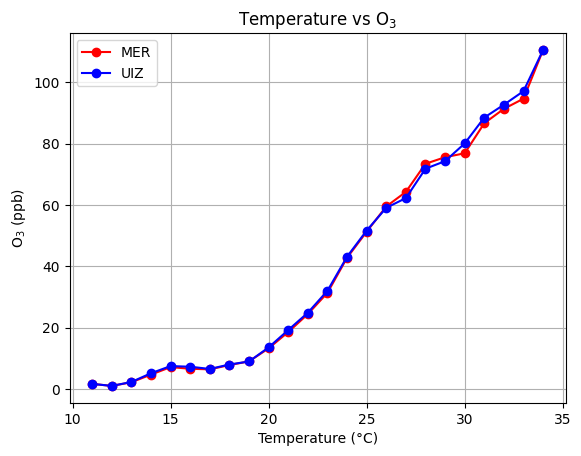

In [9]:
dir = r"C:\Users\Valeria\Documents\CIC\air_pollution_data\Datos-sep-dic2024"
file_path = os.path.join(dir,"air_traffic_MER_prom.csv")
df  = pd.read_csv(file_path)
df = df.dropna().reset_index(drop=True)

file_path = os.path.join(dir,"air_traffic_UIZ_prom.csv")
df2  = pd.read_csv(file_path)
df2 = df2.dropna().reset_index(drop=True)
df_tmp = df.groupby('TMP').agg({'O3': 'mean'}).reset_index()
df_tmp2 = df2.groupby('TMP').agg({'O3': 'mean'}).reset_index()
plt.plot(df_tmp.TMP,df_tmp.O3, marker='o', label='MER', color='r')
plt.plot(df_tmp2.TMP,df_tmp2.O3, marker='o', label='UIZ', color='b')
plt.xlabel('Temperature (°C)')
plt.ylabel(r'O$_3$ (ppb)')
title1 = r'Temperature vs O$_3$'
plt.title(title1)
plt.legend()
plt.grid(True)
plt.show()

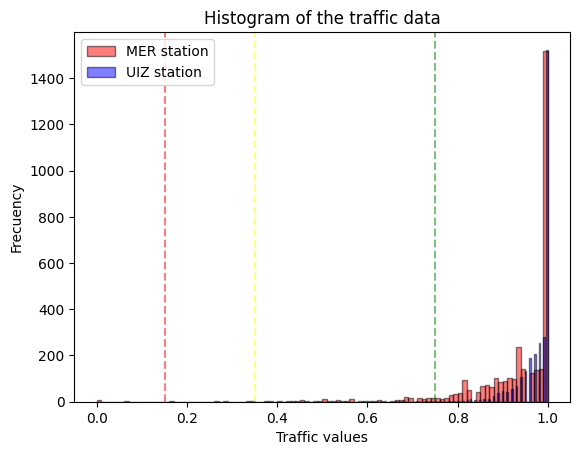

In [31]:
plt.hist(df.traffic, bins=100, color='red', edgecolor='black', alpha=0.5)
plt.hist(df2.traffic, bins=100, color='blue', edgecolor='black', alpha=0.5)
plt.title('Histogram of the traffic data')
plt.xlabel('Traffic values')
plt.ylabel('Frecuency')
plt.legend(["MER station", "UIZ station"], loc="upper left")
plt.axvline(x = 0.15, color = 'red', linestyle = '--', alpha = 0.5)
plt.axvline(x = 0.35, color = 'yellow', linestyle = '--', alpha = 0.5)
plt.axvline(x = 0.75, color = 'green', linestyle = '--', alpha = 0.5)
plt.show()

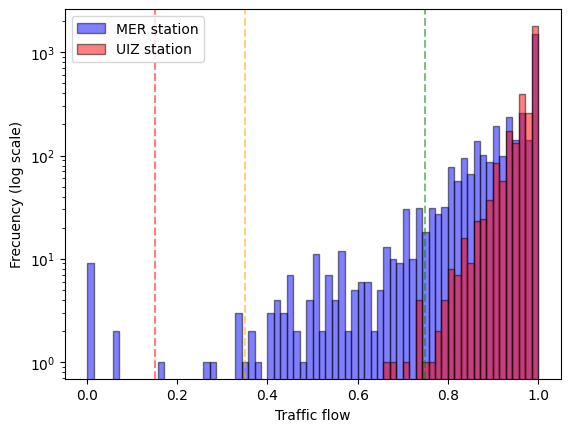

In [12]:
bin_width = (1 - 0) / 70  # Define width based on desired bins
bins = np.arange(0, 1 + bin_width, bin_width)  # Ensure consistent width
plt.hist(df[df.traffic<=1.0].traffic, bins=bins, color='blue', edgecolor='black', alpha=0.5)
plt.hist(df2[df2.traffic<=1.0].traffic, bins=bins, color='red', edgecolor='black', alpha=0.5)
plt.yscale("log")  # Log scale for y-axis
#plt.hist(df2[df2.traffic<1.0].traffic, bins=100, color='blue', edgecolor='black', alpha=0.5)
#plt.title('Histogram of the traffic data')
plt.xlabel('Traffic flow')
plt.ylabel('Frecuency (log scale)')
plt.legend(["MER station", "UIZ station"], loc="upper left")
plt.axvline(x = 0.15, color = 'red', linestyle = '--', alpha = 0.5)
plt.axvline(x = 0.35, color = 'orange', linestyle = '--', alpha = 0.5)
plt.axvline(x = 0.75, color = 'green', linestyle = '--', alpha = 0.5)
plt.show()

In [33]:
bins = [0, 0.15, 0.35, 0.75, 1.2]  # Definir los intervalos
labels = ['0-0.15', '0.15-0.35', '0.35-0.75', '0.75-1']  # Etiquetas para los intervalos
df['rango'] = pd.cut(df['traffic'], bins=bins, labels=labels, right=False)
conteo_rangos = df['rango'].value_counts()
print(conteo_rangos)


rango
0.75-1       3312
0.35-0.75     193
0-0.15         11
0.15-0.35       6
Name: count, dtype: int64


In [4]:
def plot_hist_prev(df_plot,i,j, varX, axes, trf):
	
	min_value = df_plot[varX].min()
	max_value = df_plot[varX].max()
	bin_width = (max_value - min_value) / 20  # Set number of bins 
	bins = np.arange(min_value, max_value + bin_width, bin_width)  

	axes[i, j].hist(df_plot[varX], bins=bins, color='red', edgecolor='black', alpha=0.5)
	axes[i, j].set_ylabel(r'Frequency')
	axes[i, j].set_xlabel(f"{varX}")
	axes[i, j].grid(axis="y", linestyle="--", alpha=0.7)
	axes[i,j].set_title(f'Histogram of {varX}, traffic range {trf}')
	plt.tight_layout()


In [15]:
def plot_hist(df75, df35, df15, df0, i,j, varX, axes):

	min_value = min(df75[varX].min(), df35[varX].min(), df15[varX].min(), df0[varX].min())
	max_value = max(df75[varX].max(), df35[varX].max(), df15[varX].max(), df0[varX].max())
	bin_width = (max_value - min_value) / 20  # Set number of bins 
	bins = np.arange(min_value, max_value + bin_width, bin_width)  
	
	hist1, _ = np.histogram(df75[varX], bins=bins)
	hist2, _ = np.histogram(df35[varX], bins=bins)
	hist3, _ = np.histogram(df15[varX], bins=bins)
	hist4, _ = np.histogram(df0[varX], bins=bins)


	# Normalize histograms so area = 1
	hist1 = hist1 / (len(df75) * bin_width)
	hist2 = hist2 / (len(df35) * bin_width)
	hist3 = hist3 / (len(df15) * bin_width)
	hist4 = hist4 / (len(df0) * bin_width)


	axes[i, j].step(bins[:-1], hist1, where="pre", label="Data 2", linewidth=2) 
	axes[i, j].step(bins[:-1], hist2, where="pre", label="Data 2", linewidth=2)
	axes[i, j].step(bins[:-1], hist3, where="pre", label="Data 2", linewidth=1)
	axes[i, j].step(bins[:-1], hist4, where="pre", label="Data 2", linewidth=1)
	axes[i, j].set_ylabel(r'Frequency')
	axes[i, j].set_xlabel(f"{varX}")
	axes[i, j].grid(axis="y", linestyle="--", alpha=0.7)
	axes[i, j].set_title(f'Histogram of {varX}')
	axes[i, j].legend(["traffic >=75", "0.35 <= trfc < 0.75", "0.15 <= trfc < 0.35", "traffic <0.15"], loc="upper right")
	axes[i, j].set_xlim(-0.01, max_value)  # Adjust min_value and max_value as needed

	plt.tight_layout()

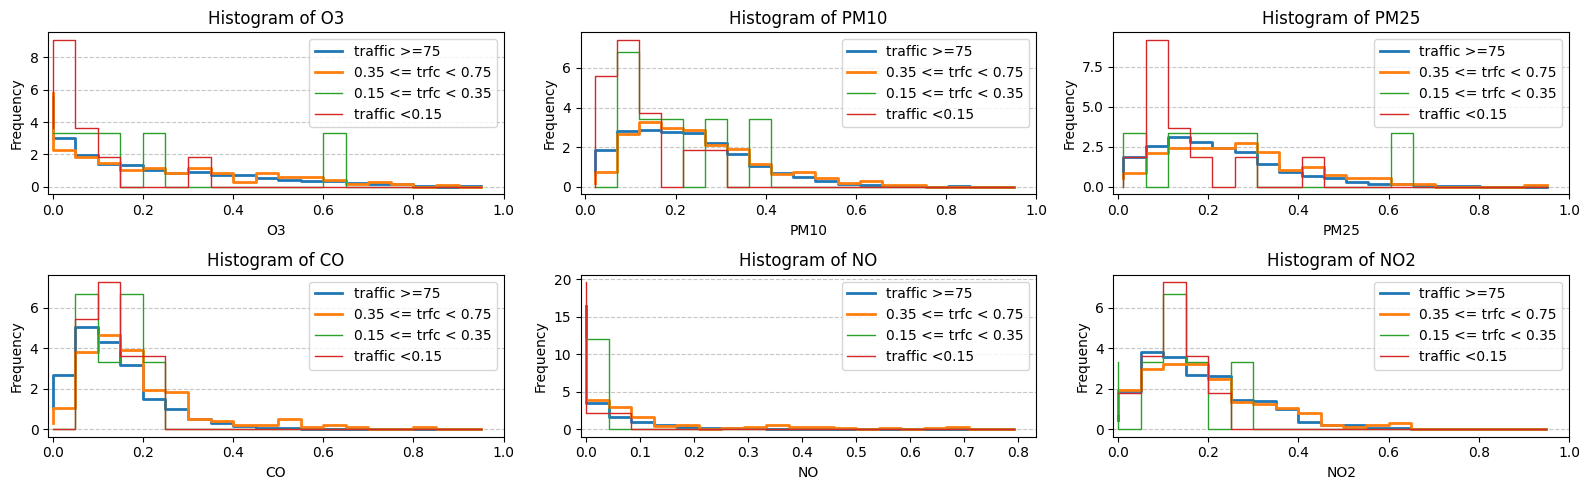

In [16]:
dir = r"C:\Users\Valeria\Documents\CIC\air_pollution_data\Datos-sep-dic2024"
#file_path = os.path.join(dir,"air_traffic_MER_prom.csv")
file_path = os.path.join(dir,"air_traffic_MER_norm.csv")
df  = pd.read_csv(file_path)
df = df.dropna().reset_index(drop=True)


df75 = df[df.traffic >= 0.75]
df35 = df[(df.traffic >= 0.35) & (df.traffic <0.75)]
df15 = df[(df.traffic >= 0.15) & (df.traffic <0.35)]
df0 = df[df.traffic < 0.15]

fig, axes = plt.subplots(2, 3, figsize=(16, 5))
pollutants = ["O3", "PM10", "PM25", "CO", "NO", "NO2"]
k = 0
for i in range(2):
	for j in range(3):
		plot_hist(df75, df35, df15, df0, i, j, pollutants[k], axes)
		k = k+1
plt.show()

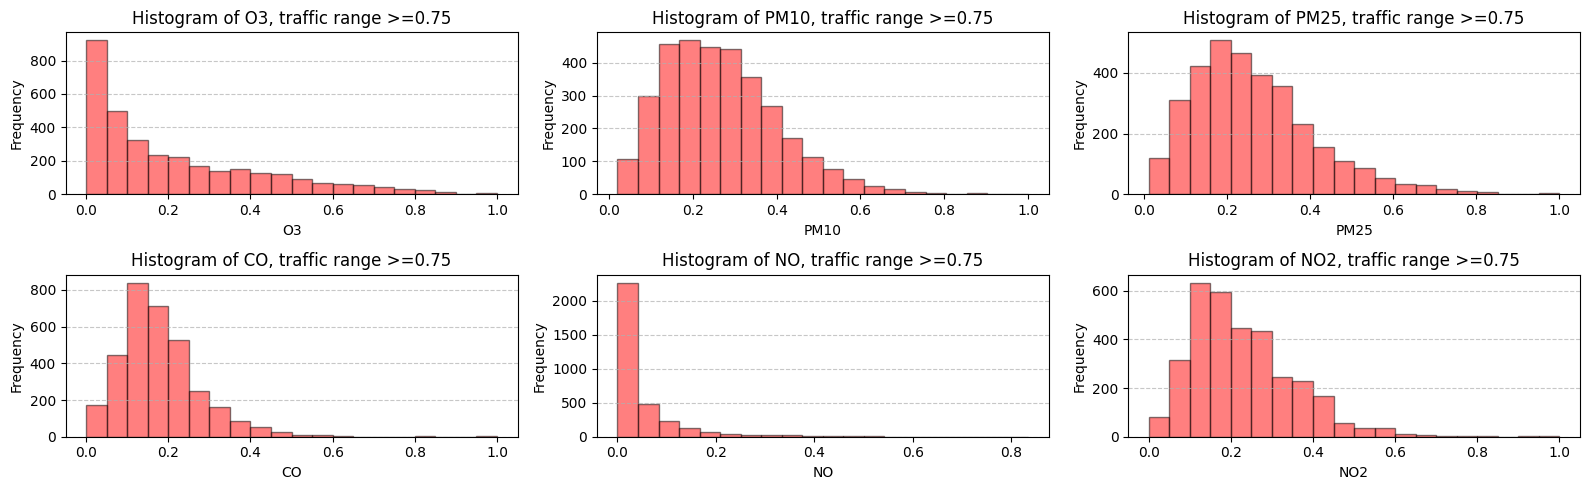

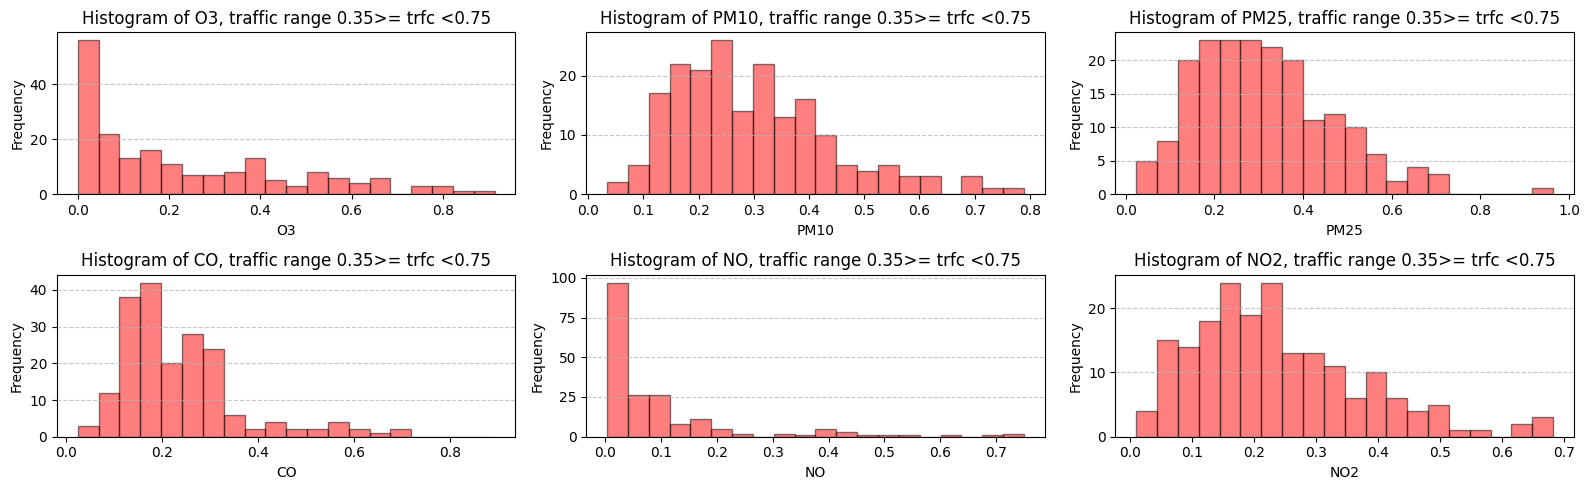

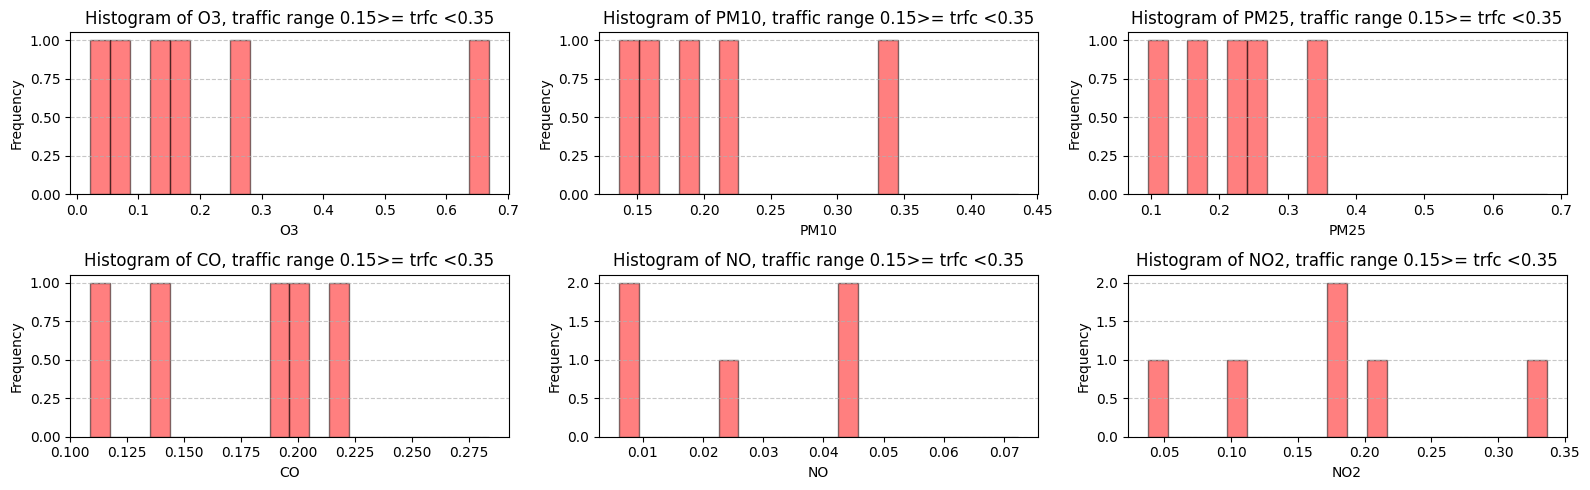

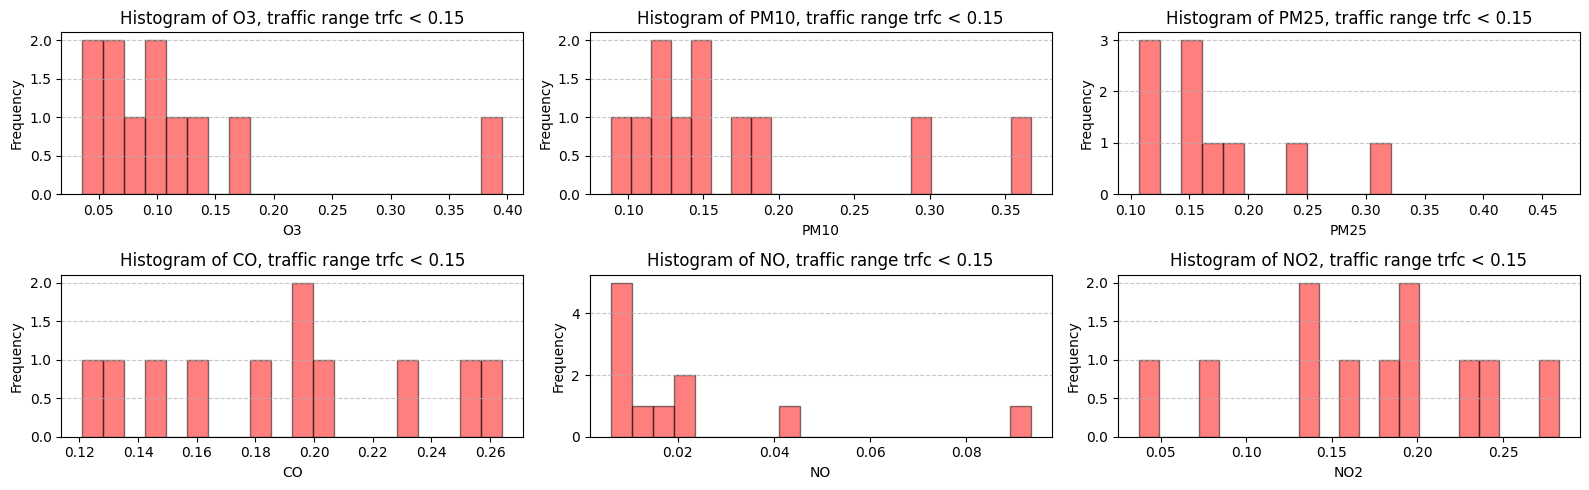

In [37]:
bin_width = (1 - 0) / 60  # Define width based on desired bins
bins = np.arange(0, 1 + bin_width, bin_width)  # Ensure consistent width
df75 = df[df.traffic >= 0.75]
fig, axes = plt.subplots(2, 3, figsize=(16, 5))
pollutants = ["O3", "PM10", "PM25", "CO", "NO", "NO2"]
k = 0
for i in range(2):
	for j in range(3):
		plot_hist_prev(df75, i, j, pollutants[k], axes, ">=0.75")
		k = k+1
plt.show()

df75 = df[(df.traffic >= 0.35) & (df.traffic <0.75)]
fig, axes = plt.subplots(2, 3, figsize=(16, 5))
pollutants = ["O3", "PM10", "PM25", "CO", "NO", "NO2"]
k = 0
for i in range(2):
	for j in range(3):
		plot_hist_prev(df75, i, j, pollutants[k], axes, "0.35>= trfc <0.75")
		k = k+1
plt.show()

df75 = df[(df.traffic >= 0.15) & (df.traffic <0.35)]
fig, axes = plt.subplots(2, 3, figsize=(16, 5))
pollutants = ["O3", "PM10", "PM25", "CO", "NO", "NO2"]
k = 0
for i in range(2):
	for j in range(3):
		plot_hist_prev(df75, i, j, pollutants[k], axes, "0.15>= trfc <0.35")
		k = k+1
plt.show()

df75 = df[df.traffic < 0.15]
fig, axes = plt.subplots(2, 3, figsize=(16, 5))
pollutants = ["O3", "PM10", "PM25", "CO", "NO", "NO2"]
k = 0
for i in range(2):
	for j in range(3):
		plot_hist_prev(df75, i, j, pollutants[k], axes, "trfc < 0.15")
		k = k+1
plt.show()

In [ ]:
dir = r"C:\Users\valer\Documents\CIC\doctorado\Proyecto_Innovacion\main\air-poll-predict-dev\API\InfoPostgres\Datos\air_traffic_MER_prom.csv"
df = pd.read_csv(dir)

In [ ]:
df.keys()

Index(['date', 'CO', 'NO', 'NOX', 'NO2', 'O3', 'PM10', 'PM25', 'RH', 'SO2',
       'TMP', 'WDR', 'WSP', 'year', 'month', 'day', 'hour', 'minute',
       'traffic'],
      dtype='object')

In [ ]:
target_idx = {'CO':0, 'NO':1, 'NOX':2, 'NO2':3, 'O3':4, 'PM10':5, 'PM25':6, 'RH':7, 'SO2':8, 'TMP':9, 'WDR':10, 'WSP':11}

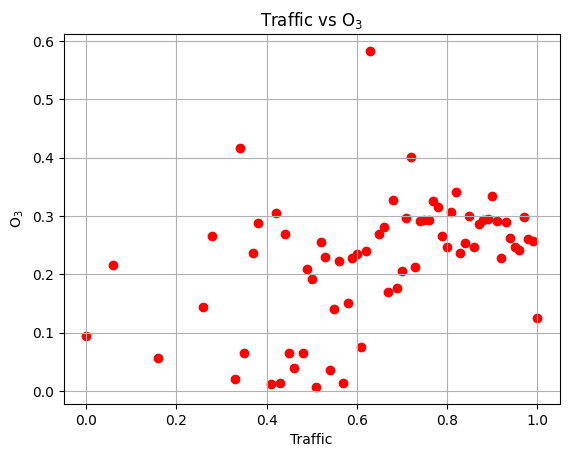

In [ ]:
df_trf = df.groupby('traffic').agg({'O3': 'mean', 'TMP': 'mean',  }).reset_index()
plt.scatter(df_trf.traffic,df_trf.O3, marker='o', label='O3', color='r')
#plt.plot(df_trf.TMP,df_trf.O3, marker='o', label='TMP', color='b')
plt.xlabel('Traffic')
plt.ylabel(r'O$_3$')
title1 = r'Traffic vs O$_3$'
plt.title(title1)
#plt.legend()
plt.grid(True)
plt.show()

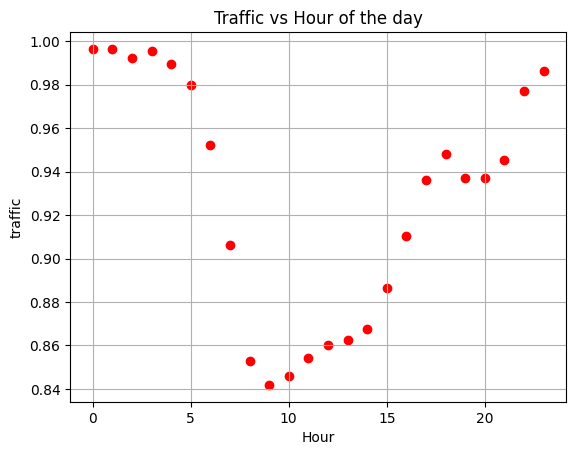

In [ ]:
df_trf = df.groupby('hour').agg({'traffic': 'mean', 'O3': 'mean',  }).reset_index()
plt.scatter(df_trf.hour,df_trf.traffic, marker='o', label='O3', color='r')
#plt.plot(df_trf.TMP,df_trf.O3, marker='o', label='TMP', color='b')
plt.xlabel('Hour')
plt.ylabel(r'traffic')
title1 = r'Traffic vs Hour of the day'
plt.title(title1)
#plt.legend()
plt.grid(True)
plt.show()

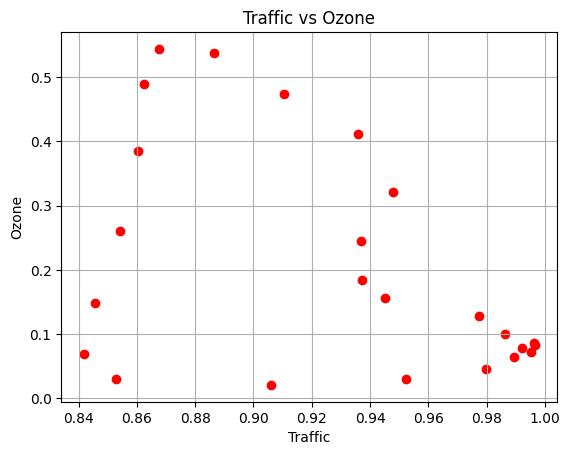

In [ ]:
df_trf = df.groupby('hour').agg({'traffic': 'mean', 'O3': 'mean' }).reset_index()
plt.scatter(df_trf.traffic,df_trf.O3, marker='o', label='O3', color='r')
#plt.plot(df_trf.TMP,df_trf.O3, marker='o', label='TMP', color='b')
plt.xlabel('Traffic')
plt.ylabel(r'Ozone')
title1 = r'Traffic vs Ozone'
plt.title(title1)
#plt.legend()
plt.grid(True)
plt.show()